<b> <font size = 5> Feature Engineering </b> </font>

In [1]:
#Import basic python packages for data analysis and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.lines as mlines
import pylab as plot
import matplotlib
import geopandas as gpd
from shapely.geometry import Point, Polygon
from shapely.ops import nearest_points
import random
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
import time

### Import Sklearn packages
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor



### Import Scipy stats packages
from scipy.stats import pearsonr
from scipy.stats import boxcox


# Import statsmodel packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices


#Sequential Feature Selector
from mlxtend.feature_selection import SequentialFeatureSelector as SFS



import re


import warnings
warnings.filterwarnings("ignore")

sns.set(style = 'whitegrid')
sns.set_palette('bright')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<b> <font size = 5> <span style="color:blue"> Load the Dataframes </b> </font> </span>

<b> <font size = 3> <span style="color:blue"> Read dataframe - unclustered set of points </b> </font> </span>

In [3]:
## Reading input data
BC_unclustered = pd.read_csv("Data/BC_input.csv")
NO2_unclustered = pd.read_csv("Data/NO2_input.csv")

<b> <font size = 3> <span style="color:blue">Load Input Data Frame with Clustered Points</b> </font> </span>

In [4]:
BC= pd.read_csv("Data/BC_input_clustered.csv")
NO2 = pd.read_csv("Data/NO2_input_clustered.csv")

In [5]:
#Drop the first column and rename 'BC Value' and 'NO2 Value'
BC.drop(columns = ['Unnamed: 0'], inplace=True)
NO2.drop(columns = ['Unnamed: 0'], inplace=True)

BC.rename(columns = {'BC Value': 'BC_Value'}, inplace = True)
NO2.rename(columns = {'NO2 Value': 'NO2_Value'}, inplace = True)

<b> <font size = 3> <span style="color:blue">Create feature list</b> </font> </span>

In [183]:
# Create a feature list by dropping BC_value and NO2_value
BC_features = BC.drop(columns = ['BC_Value'])
NO2_features = NO2.drop(columns = ['NO2_Value'])

X_BC_scaled = pd.DataFrame(StandardScaler().fit_transform(BC_features), index = BC_features.index, columns = BC_features.columns)

BC_df_scaled = pd.concat([BC['BC_Value'], X_BC_scaled], axis = 1)


X_NO2_scaled = pd.DataFrame(StandardScaler().fit_transform(NO2_features), index = NO2_features.index, columns = NO2_features.columns)


NO2_df_scaled = pd.concat([NO2['NO2_Value'], X_NO2_scaled], axis = 1)


<b> <font size = 5> <span style="color:darkorange"> Simple OLS fit on each feature individually  </b> </font> </span>

<b> <font size = 4> <span style="color:darkorange"> BC Dataset </b> </font> </span>

In [184]:
r2_BC = []
for column in BC_features.columns[0:]:
        r2 = sm.OLS(BC['BC_Value'], BC_features[column]).fit().rsquared
        r2_BC.append(r2)
BC_r2_score_df = pd.DataFrame({'Feature': BC_features.columns, 'Individual_R2':r2_BC})


In [185]:
BC_r2_score_df.sort_values('Individual_R2', ascending = False)

Feature  Individual_R2
62                          Radiation       0.590165
63                            Maxtemp       0.589760
64                            Mintemp       0.589044
65                           Pressure       0.588588
12       high-FoodPlant-14318611_dist       0.575417
41      high-Retail-Res-14122011_dist       0.570582
51        high-Retail-Res-310411_dist       0.563379
61                             Precip       0.556658
34              high-Misc-382911_dist       0.554294
53        high-Retail-Res-448011_dist       0.549553
29     high-Manufacturing-380611_dist       0.548110
27     high-Manufacturing-140211_dist       0.545369
60           high-Waste-18782611_dist       0.544306
11          high-Eateries-771711_dist       0.543367
0     high-AsphaltPlant-10510811_dist       0.542784
33            high-Misc-18134411_dist       0.533272
7             high-EGen-10707511_dist       0.533143
37      high-Retail-Res-10517111_dist       0.531298
49        high-Retail-Res-203711_dist       0.528982
2         high-AutoRepair-138911_dist       0.528921
6      high-ConcretePlant-477811_dist       0.527593
13       high-FoodPlant-15713811_dist       0.526383
56    high-Transportation-444911_dist       0.525455
22        high-Foundaries-405311_dist       0.525433
20        high-Foundaries-382111_dist       0.524864
21       high-Foundaries-3963311_dist       0.523493
5      high-ConcretePlant-193511_dist       0.520920
28   high-Manufacturing-14267411_dist       0.520057
1       high-AsphaltPlant-808611_dist       0.516740
24   high-Manufacturing-10476711_dist       0.515343
58           high-Waste-10708011_dist       0.514032
30    high-Manufacturing-3963411_dist       0.512462
17         high-FoodPlant-512911_dist       0.512098
10          high-Eateries-375111_dist       0.510477
52        high-Retail-Res-338911_dist       0.507126
19      high-Foundaries-10457711_dist       0.506012
42        high-Retail-Res-141411_dist       0.504559
31     high-Manufacturing-445511_dist       0.503249
50        high-Retail-Res-310211_dist       0.500737
47      high-Retail-Res-17244511_dist       0.499262
23   high-Manufacturing-10457411_dist       0.497002
14       high-FoodPlant-15756011_dist       0.492206
54        high-Retail-Res-450311_dist       0.492125
3       high-AutoRepair-15714511_dist       0.488858
25   high-Manufacturing-10708111_dist       0.485788
15         high-FoodPlant-340611_dist       0.483526
35      high-Retail-Res-10460511_dist       0.454001
8               high-EGen-136511_dist       0.443838
55  high-Transportation-18135311_dist       0.439428
45      high-Retail-Res-15745711_dist       0.431574
57              high-WWTP-379511_dist       0.427486
18         high-FoodPlant-808811_dist       0.424840
39        high-Retail-Res-137211_dist       0.424788
48      high-Retail-Res-18492711_dist       0.423145
40      high-Retail-Res-13761011_dist       0.422086
32     high-Manufacturing-515411_dist       0.421647
26   high-Manufacturing-13801611_dist       0.417343
46      high-Retail-Res-15941111_dist       0.412606
16         high-FoodPlant-343011_dist       0.411691
38       high-Retail-Res-1106211_dist       0.410945
59             high-Waste-168411_dist       0.408350
43      high-Retail-Res-14241511_dist       0.406593
4    high-ConcretePlant-10518911_dist       0.403963
9               high-EGen-772011_dist       0.402522
44      high-Retail-Res-14292411_dist       0.401621
66                               Dist       0.401477
36      high-Retail-Res-10469511_dist       0.401449
67               number_intersections       0.275175

<div class="alert alert-block alert-success"> <b> The above cells shows that the top few features having the largest correlation with BC concentration are Radiation, max temperature, min temperature, pressure, Foodplant-14318611, Retail-Res-14122011.  </b> </div>

<b> <font size = 4> <span style="color:darkorange"> NO2 Dataset </b> </font> </span>

In [186]:
r2_NO2 = []
for column in NO2_features.columns[0:]:
        r2 = sm.OLS(NO2['NO2_Value'], NO2_features[column]).fit().rsquared
        r2_NO2.append(r2)
NO2_r2_score_df = pd.DataFrame({'Feature': NO2_features.columns, 'Individual_R2':r2_NO2})


In [187]:
NO2_r2_score_df.sort_values('Individual_R2', ascending = False)

Feature  Individual_R2
53                         Radiation       0.758557
55                           Mintemp       0.757694
54                           Maxtemp       0.757622
56                          Pressure       0.757288
52                            Precip       0.734353
7       high-FoodPlant-14318611_dist       0.726710
33     high-Retail-Res-14122011_dist       0.694962
48   high-Transportation-444911_dist       0.690082
23    high-Manufacturing-773811_dist       0.688553
27             high-Misc-382911_dist       0.688545
49             high-WWTP-203811_dist       0.685729
17  high-Manufacturing-14071611_dist       0.685602
51          high-Waste-10708011_dist       0.683692
44       high-Retail-Res-310411_dist       0.681715
37     high-Retail-Res-18135811_dist       0.679606
20   high-Manufacturing-3963411_dist       0.678049
6          high-Eateries-771711_dist       0.677396
16    high-Manufacturing-140211_dist       0.676332
9         high-FoodPlant-512911_dist       0.675807
10        high-FoodPlant-804911_dist       0.675595
12       high-Foundaries-382111_dist       0.669193
22   high-Manufacturing-4955911_dist       0.667148
41     high-Retail-Res-18697911_dist       0.666031
19  high-Manufacturing-14267411_dist       0.665160
0    high-AsphaltPlant-10510811_dist       0.664567
34     high-Retail-Res-15721111_dist       0.663915
8         high-FoodPlant-340611_dist       0.662469
21    high-Manufacturing-445511_dist       0.662308
26           high-Misc-18132711_dist       0.662117
15  high-Manufacturing-13983311_dist       0.659536
46       high-Retail-Res-448011_dist       0.635966
3            high-EGen-10707511_dist       0.611855
29     high-Retail-Res-10517111_dist       0.610230
32     high-Retail-Res-13825511_dist       0.609867
47      high-Retail-Res-7845611_dist       0.607792
1      high-AsphaltPlant-808611_dist       0.593525
36     high-Retail-Res-18133511_dist       0.591310
5          high-Eateries-375111_dist       0.584253
43       high-Retail-Res-310211_dist       0.574519
45       high-Retail-Res-338911_dist       0.572972
13       high-Foundaries-405311_dist       0.572130
18  high-Manufacturing-14182811_dist       0.565011
2        high-AutoRepair-195711_dist       0.558022
57                              Dist       0.551990
28     high-Retail-Res-10460511_dist       0.499360
24           high-Misc-13985611_dist       0.497682
4              high-EGen-136511_dist       0.477657
35     high-Retail-Res-15745711_dist       0.472492
50             high-WWTP-379511_dist       0.470220
11        high-FoodPlant-808811_dist       0.469574
40     high-Retail-Res-18697211_dist       0.469191
31     high-Retail-Res-13761011_dist       0.460848
42       high-Retail-Res-200611_dist       0.456505
30       high-Retail-Res-127511_dist       0.452391
14  high-Manufacturing-10457511_dist       0.447205
25           high-Misc-15974511_dist       0.445573
39     high-Retail-Res-18496511_dist       0.443331
38     high-Retail-Res-18495611_dist       0.436256
58              number_intersections       0.423860

<div class="alert alert-block alert-success"> <b> The above cells shows that the top few features having the largest correlation with BC concentration are Radiation, min temperature, max temperature, pressure, precipitation, Foodplant-14318611.  </b> </div>

<b> <font size = 5> <span style="color:darkorange"> Identify and drop the features that are highly positively correlated or negatively correlated and fit an OLS on the remaining features </b> </font> </span>

In [188]:
# Next, identify all the features that have a correlation higher than 0.90 or lower than -0.90 indicating a strong positive or negative correlation
threshold_1 = 0.90
threshold_2 = -0.90

def features_high_corr(df_features_corr):
    columns = np.full((df_features_corr.shape[0],), True, dtype=bool)
    for i in range(df_features_corr.shape[0]):
        for j in range(i+1, df_features_corr.shape[0]):
            if (df_features_corr.iloc[i,j] >= threshold_1) | (df_features_corr.iloc[i,j] <= threshold_2) :
                if columns[j]:
                    columns[j] = False
    selected_columns = df_features_corr.columns[columns]
    return selected_columns


<b> <font size = 4> <span style="color:darkorange"> BC Dataset </b> </font> </span>

In [189]:
BC_features_corr = BC_features.corr()
BC_features_OLS = features_high_corr(BC_features_corr)
print("Features in BC dataset that are not highly correlated: ")
print(BC_features_OLS)

Features in BC dataset that are not highly correlated: 
Index(['high-AsphaltPlant-10510811_dist', 'high-AsphaltPlant-808611_dist',
       'high-AutoRepair-15714511_dist', 'Precip', 'Radiation', 'Maxtemp',
       'Mintemp', 'Pressure', 'number_intersections'],
      dtype='object')


In [190]:
#Create a dataframe with BC value and selected columns from Lasso
OLS_BC_df = BC[['BC_Value']].join(BC[['high-AsphaltPlant-10510811_dist', 'high-AsphaltPlant-808611_dist',
       'high-AutoRepair-15714511_dist', 'Precip', 'Radiation', 'Maxtemp',
       'Mintemp', 'Pressure', 'number_intersections']])

In [191]:
## Plot Correlation matrix
OLS_BC_df_corr = OLS_BC_df.corr()
BC_features_corr_mat = OLS_BC_df_corr.as_matrix()


module://ipykernel.pylab.backend_inline


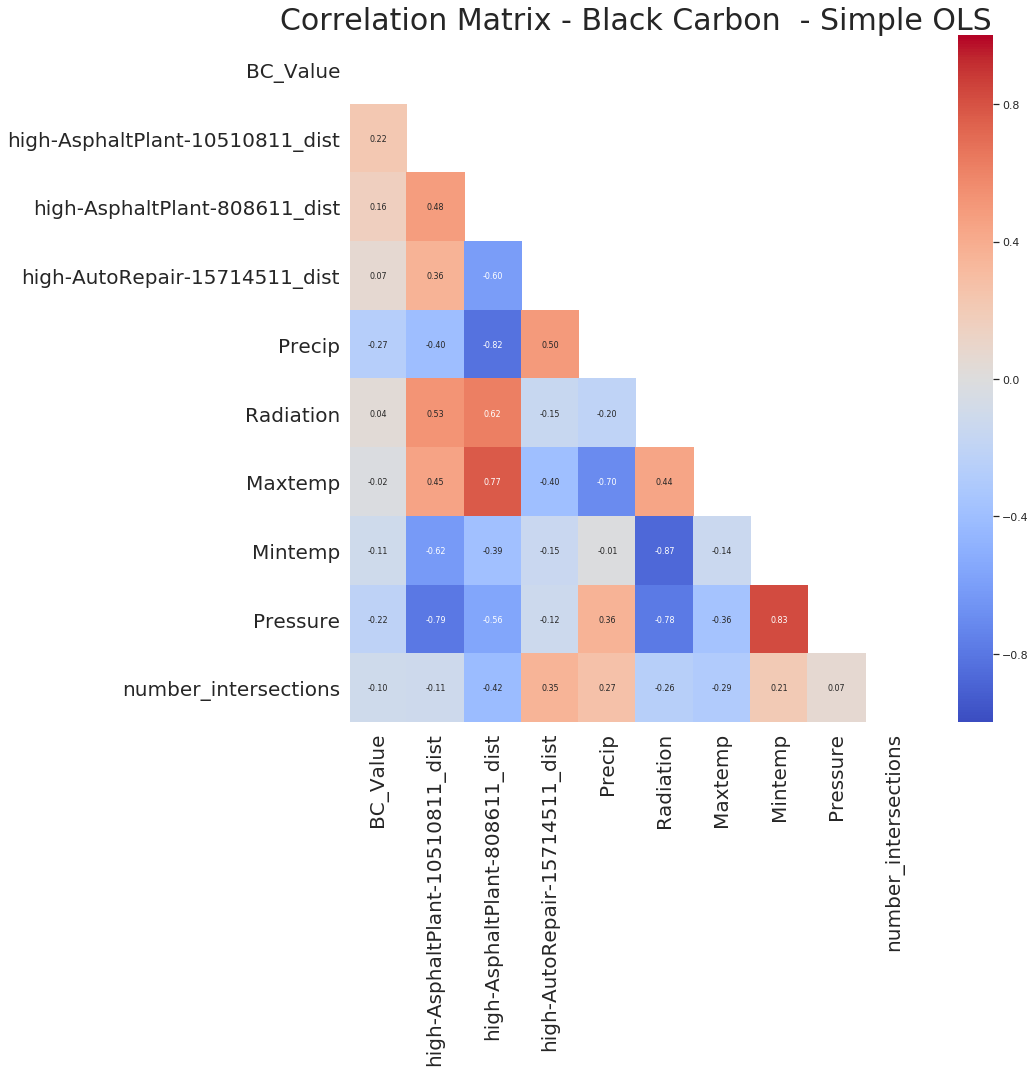

In [192]:
print(plt.get_backend())

# close any existing plots
plt.close("all")

# mask out the top triangle
BC_features_corr_mat[np.triu_indices_from(BC_features_corr_mat)] = np.nan

fig, ax = plt.subplots(figsize=(15, 15))

hm = sns.heatmap(BC_features_corr_mat, cbar=True, vmin = -1, vmax = 1, center = 0,
                 fmt='.2f', annot_kws={'size': 8}, annot=True, 
                 square=False, cmap = 'coolwarm')
#cmap=plt.cm.Blues

ticks = np.arange(OLS_BC_df_corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(OLS_BC_df_corr.columns, rotation=90, fontsize=20)
ax.set_yticks(ticks)
ax.set_yticklabels(OLS_BC_df_corr.index, rotation=360, fontsize=20)

ax.set_title('Correlation Matrix - Black Carbon  - Simple OLS', fontsize  = 30)
plt.tight_layout()
#plt.savefig("corr_matrix_incl_anno_double.png", dpi=300)

In [193]:
## Fit an OLS on the remaining features
BC_OLS_corr_model = sm.OLS(BC['BC_Value'], BC_features[BC_features_OLS])
BC_OLS_corr_results = BC_OLS_corr_model.fit() 
BC_OLS_corr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               BC_Value   R-squared (uncentered):                   0.682
Model:                            OLS   Adj. R-squared (uncentered):              0.682
Method:                 Least Squares   F-statistic:                              5121.
Date:                Sun, 14 Jun 2020   Prob (F-statistic):                        0.00
Time:                        23:09:48   Log-Likelihood:                         -16976.
No. Observations:               21488   AIC:                                  3.397e+04
Df Residuals:                   21479   BIC:                                  3.404e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
high-AsphaltPlant-10510811_dist    -0.0399      0.005     -8.699      0.000      -0.049      -0.031
high-AsphaltPlant-808611_dist       0.0155      0.004      4.270      0.000       0.008       0.023
high-AutoRepair-15714511_dist       0.0836      0.004     23.350      0.000       0.077       0.091
Precip                             -2.7197      0.077    -35.422      0.000      -2.870      -2.569
Radiation                           0.0899      0.002     36.860      0.000       0.085       0.095
Maxtemp                            -1.5640      0.039    -40.448      0.000      -1.640      -1.488
Mintemp                             0.2596      0.134      1.941      0.052      -0.003       0.522
Pressure                            0.0039      0.002      2.092      0.036       0.000       0.008
number_intersections               -0.0121      0.001    -16.788      0.000      -0.013      -0.011
==============================================================================
Omnibus:                     5567.049   Durbin-Watson:                   0.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18211.398
Skew:                           1.309   Prob(JB):                         0.00
Kurtosis:                       6.672   Cond. No.                     3.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [194]:
## R2, Coefficient and Intercept
print("The R2 is {}".format(BC_OLS_corr_results.rsquared), "The R2 tells us that there is a correlation between the features identified and concentration. ")

The R2 is 0.6821037513116219 The R2 tells us that there is a correlation between the features identified and concentration. 


Text(5, 2.5, 'R2 = 0.682')

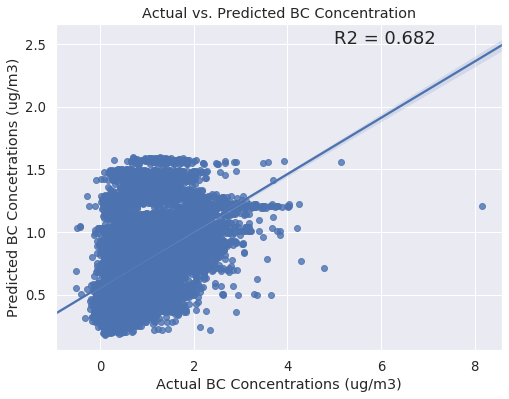

In [195]:
# Creating a plot of BC concentration vs predicted concentration using OLS
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)
plt.figure(figsize = (8,6))
ax = sns.regplot(x = BC.BC_Value, y = BC_OLS_corr_results.fittedvalues, fit_reg=True)
ax.set(xlabel = 'Actual BC Concentrations (ug/m3)', ylabel = 'Predicted BC Concetrations (ug/m3)')
plt.title('Actual vs. Predicted BC Concentration')
plt.text(5 , 2.5 ,"R2 = 0.682", fontsize = 18)


<div class="alert alert-block alert-success"> <b> The above plot shows that the simple linear model does a decent job of predicting concentrations below 2 ug/m3, but does not perform well at high concentrations. Features that had a correlation coefficient below 0.9 or above -0.9, include AsphaltPlant-10510811, AsphaltPlant-808611,
       AutoRepair-15714511, Precip, Radiation, Maxtemp,
       Mintemp, Pressure, number_intersections  </b> </div>

<b> <font size = 4> <span style="color:darkorange"> NO2 Dataset </b> </font> </span>

In [196]:
NO2_features_corr = NO2_features.corr()
NO2_features_OLS = features_high_corr(NO2_features_corr)
print("Features in NO2 dataset that are not highly correlated: ")
print(NO2_features_OLS)

Features in NO2 dataset that are not highly correlated: 
Index(['high-AsphaltPlant-10510811_dist', 'high-AsphaltPlant-808611_dist',
       'high-FoodPlant-340611_dist', 'Precip', 'Radiation', 'Maxtemp',
       'Mintemp', 'Pressure', 'number_intersections'],
      dtype='object')


In [197]:
#Create a dataframe with NO2 value and selected columns from Lasso
OLS_NO2_df = NO2[['NO2_Value']].join(NO2[['high-AsphaltPlant-10510811_dist', 'high-AsphaltPlant-808611_dist',
       'high-FoodPlant-340611_dist', 'Precip', 'Radiation', 'Maxtemp',
       'Mintemp', 'Pressure', 'number_intersections']])

In [198]:
## Plot Correlation matrix
OLS_NO2_df_corr = OLS_NO2_df.corr()
NO2_features_corr_mat = OLS_NO2_df_corr.as_matrix()


module://ipykernel.pylab.backend_inline


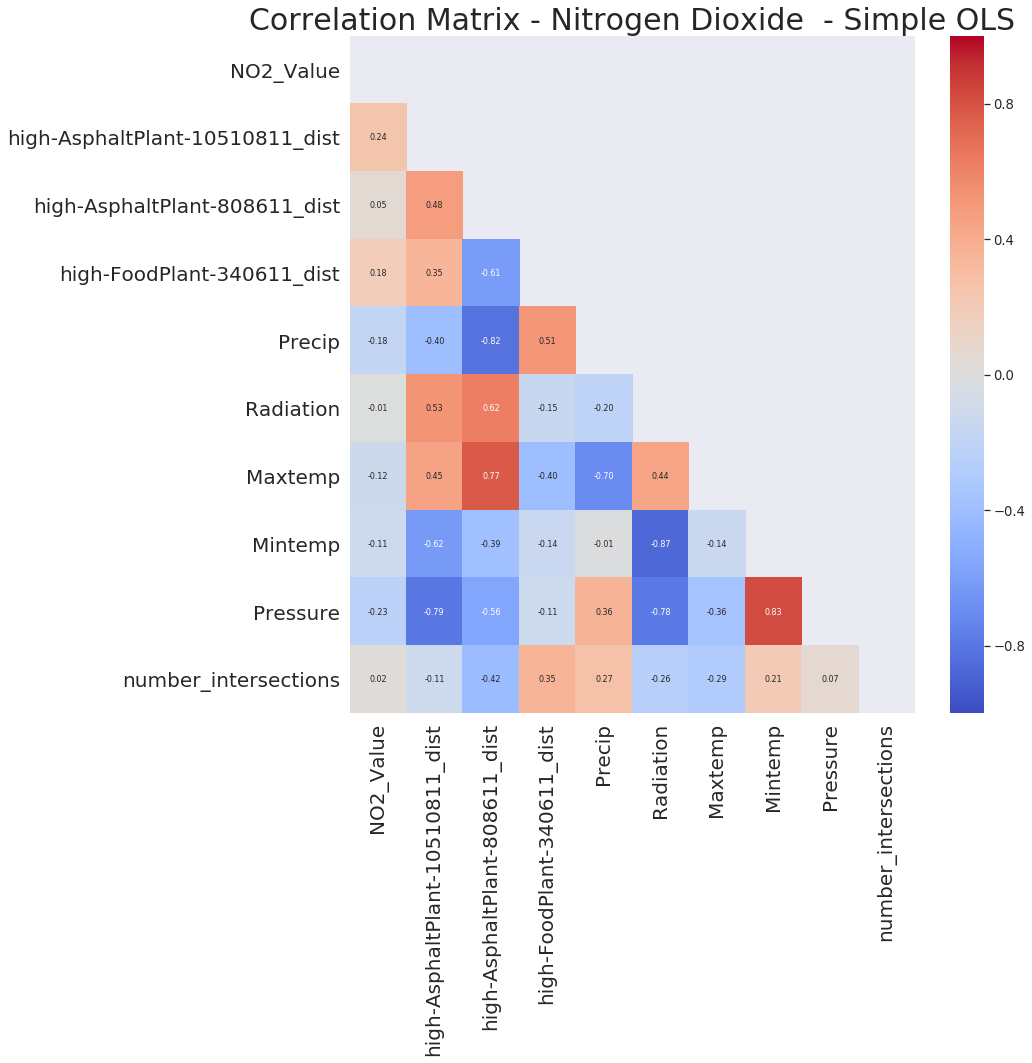

In [199]:
print(plt.get_backend())

# close any existing plots
plt.close("all")

# mask out the top triangle
NO2_features_corr_mat[np.triu_indices_from(NO2_features_corr_mat)] = np.nan

fig, ax = plt.subplots(figsize=(15, 15))

hm = sns.heatmap(NO2_features_corr_mat, cbar=True, vmin = -1, vmax = 1, center = 0,
                 fmt='.2f', annot_kws={'size': 8}, annot=True, 
                 square=False, cmap = 'coolwarm')
#cmap=plt.cm.Blues

ticks = np.arange(OLS_NO2_df_corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(OLS_NO2_df_corr.columns, rotation=90, fontsize=20)
ax.set_yticks(ticks)
ax.set_yticklabels(OLS_NO2_df_corr.index, rotation=360, fontsize=20)

ax.set_title('Correlation Matrix - Nitrogen Dioxide  - Simple OLS', fontsize  = 30)
plt.tight_layout()
#plt.savefig("corr_matrix_incl_anno_double.png", dpi=300)

In [200]:
## Fit an OLS on the remaining features
NO2_OLS_corr_model = sm.OLS(NO2['NO2_Value'], NO2_features[NO2_features_OLS])
NO2_OLS_corr_results = NO2_OLS_corr_model.fit() 
NO2_OLS_corr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              NO2_Value   R-squared (uncentered):                   0.818
Model:                            OLS   Adj. R-squared (uncentered):              0.818
Method:                 Least Squares   F-statistic:                          1.075e+04
Date:                Sun, 14 Jun 2020   Prob (F-statistic):                        0.00
Time:                        23:09:52   Log-Likelihood:                         -76254.
No. Observations:               21488   AIC:                                  1.525e+05
Df Residuals:                   21479   BIC:                                  1.526e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
high-AsphaltPlant-10510811_dist     0.1445      0.072      2.017      0.044       0.004       0.285
high-AsphaltPlant-808611_dist      -0.1970      0.057     -3.447      0.001      -0.309      -0.085
high-FoodPlant-340611_dist          0.9573      0.057     16.924      0.000       0.846       1.068
Precip                            -43.8396      1.213    -36.156      0.000     -46.216     -41.463
Radiation                           1.6794      0.038     43.681      0.000       1.604       1.755
Maxtemp                           -29.0032      0.610    -47.551      0.000     -30.199     -27.808
Mintemp                             8.8408      2.111      4.189      0.000       4.704      12.978
Pressure                            0.0129      0.029      0.442      0.658      -0.044       0.070
number_intersections               -0.0728      0.011     -6.411      0.000      -0.095      -0.051
==============================================================================
Omnibus:                     1881.925   Durbin-Watson:                   0.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2437.379
Skew:                           0.772   Prob(JB):                         0.00
Kurtosis:                       3.579   Cond. No.                     3.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [201]:
## R2, Coefficient and Intercept
print("The R2 is {}".format(NO2_OLS_corr_results.rsquared), "The R2 tells us that there is a correlation between the features identified and concentration. ")

The R2 is 0.8183457629742368 The R2 tells us that there is a correlation between the features identified and concentration. 


Text(46, 29, 'R2 = 0.818')

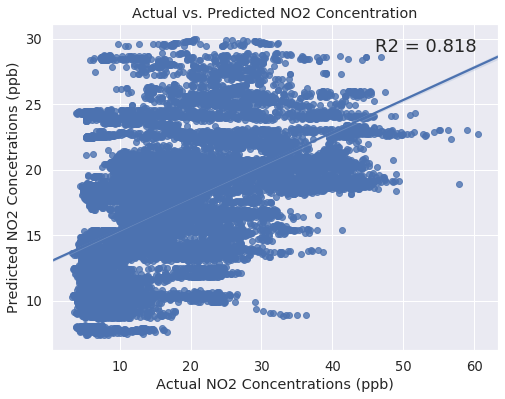

In [202]:
# Creating a plot of NO2 concentration vs predicted concentration using OLS
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)
plt.figure(figsize = (8,6))
ax = sns.regplot(x = NO2.NO2_Value, y = NO2_OLS_corr_results.fittedvalues, fit_reg=True)
ax.set(xlabel = 'Actual NO2 Concentrations (ppb)', ylabel = 'Predicted NO2 Concetrations (ppb)')
plt.title('Actual vs. Predicted NO2 Concentration')
plt.text(46 , 29 ,"R2 = 0.818", fontsize = 18)


<div class="alert alert-block alert-success"> <b>Once again, the above plot shows that the simple linear model does a decent job of predicting concentrations below 30 ppb, but does not perform well at high concentrations. Features that had a correlation coefficient below 0.9 or above -0.9 include AsphaltPlant-10510811, AsphaltPlant-808611,FoodPlant-340611, Precip, Radiation, Maxtemp, Mintemp, Pressure, number_intersections</b></div>

<b> <font size = 5> <span style="color:darkorange"> Plotting a histogram of all features </b> </font> </span>

<b> <font size = 3> <span style="color:darkorange">BC dataset </b> </font> </span>

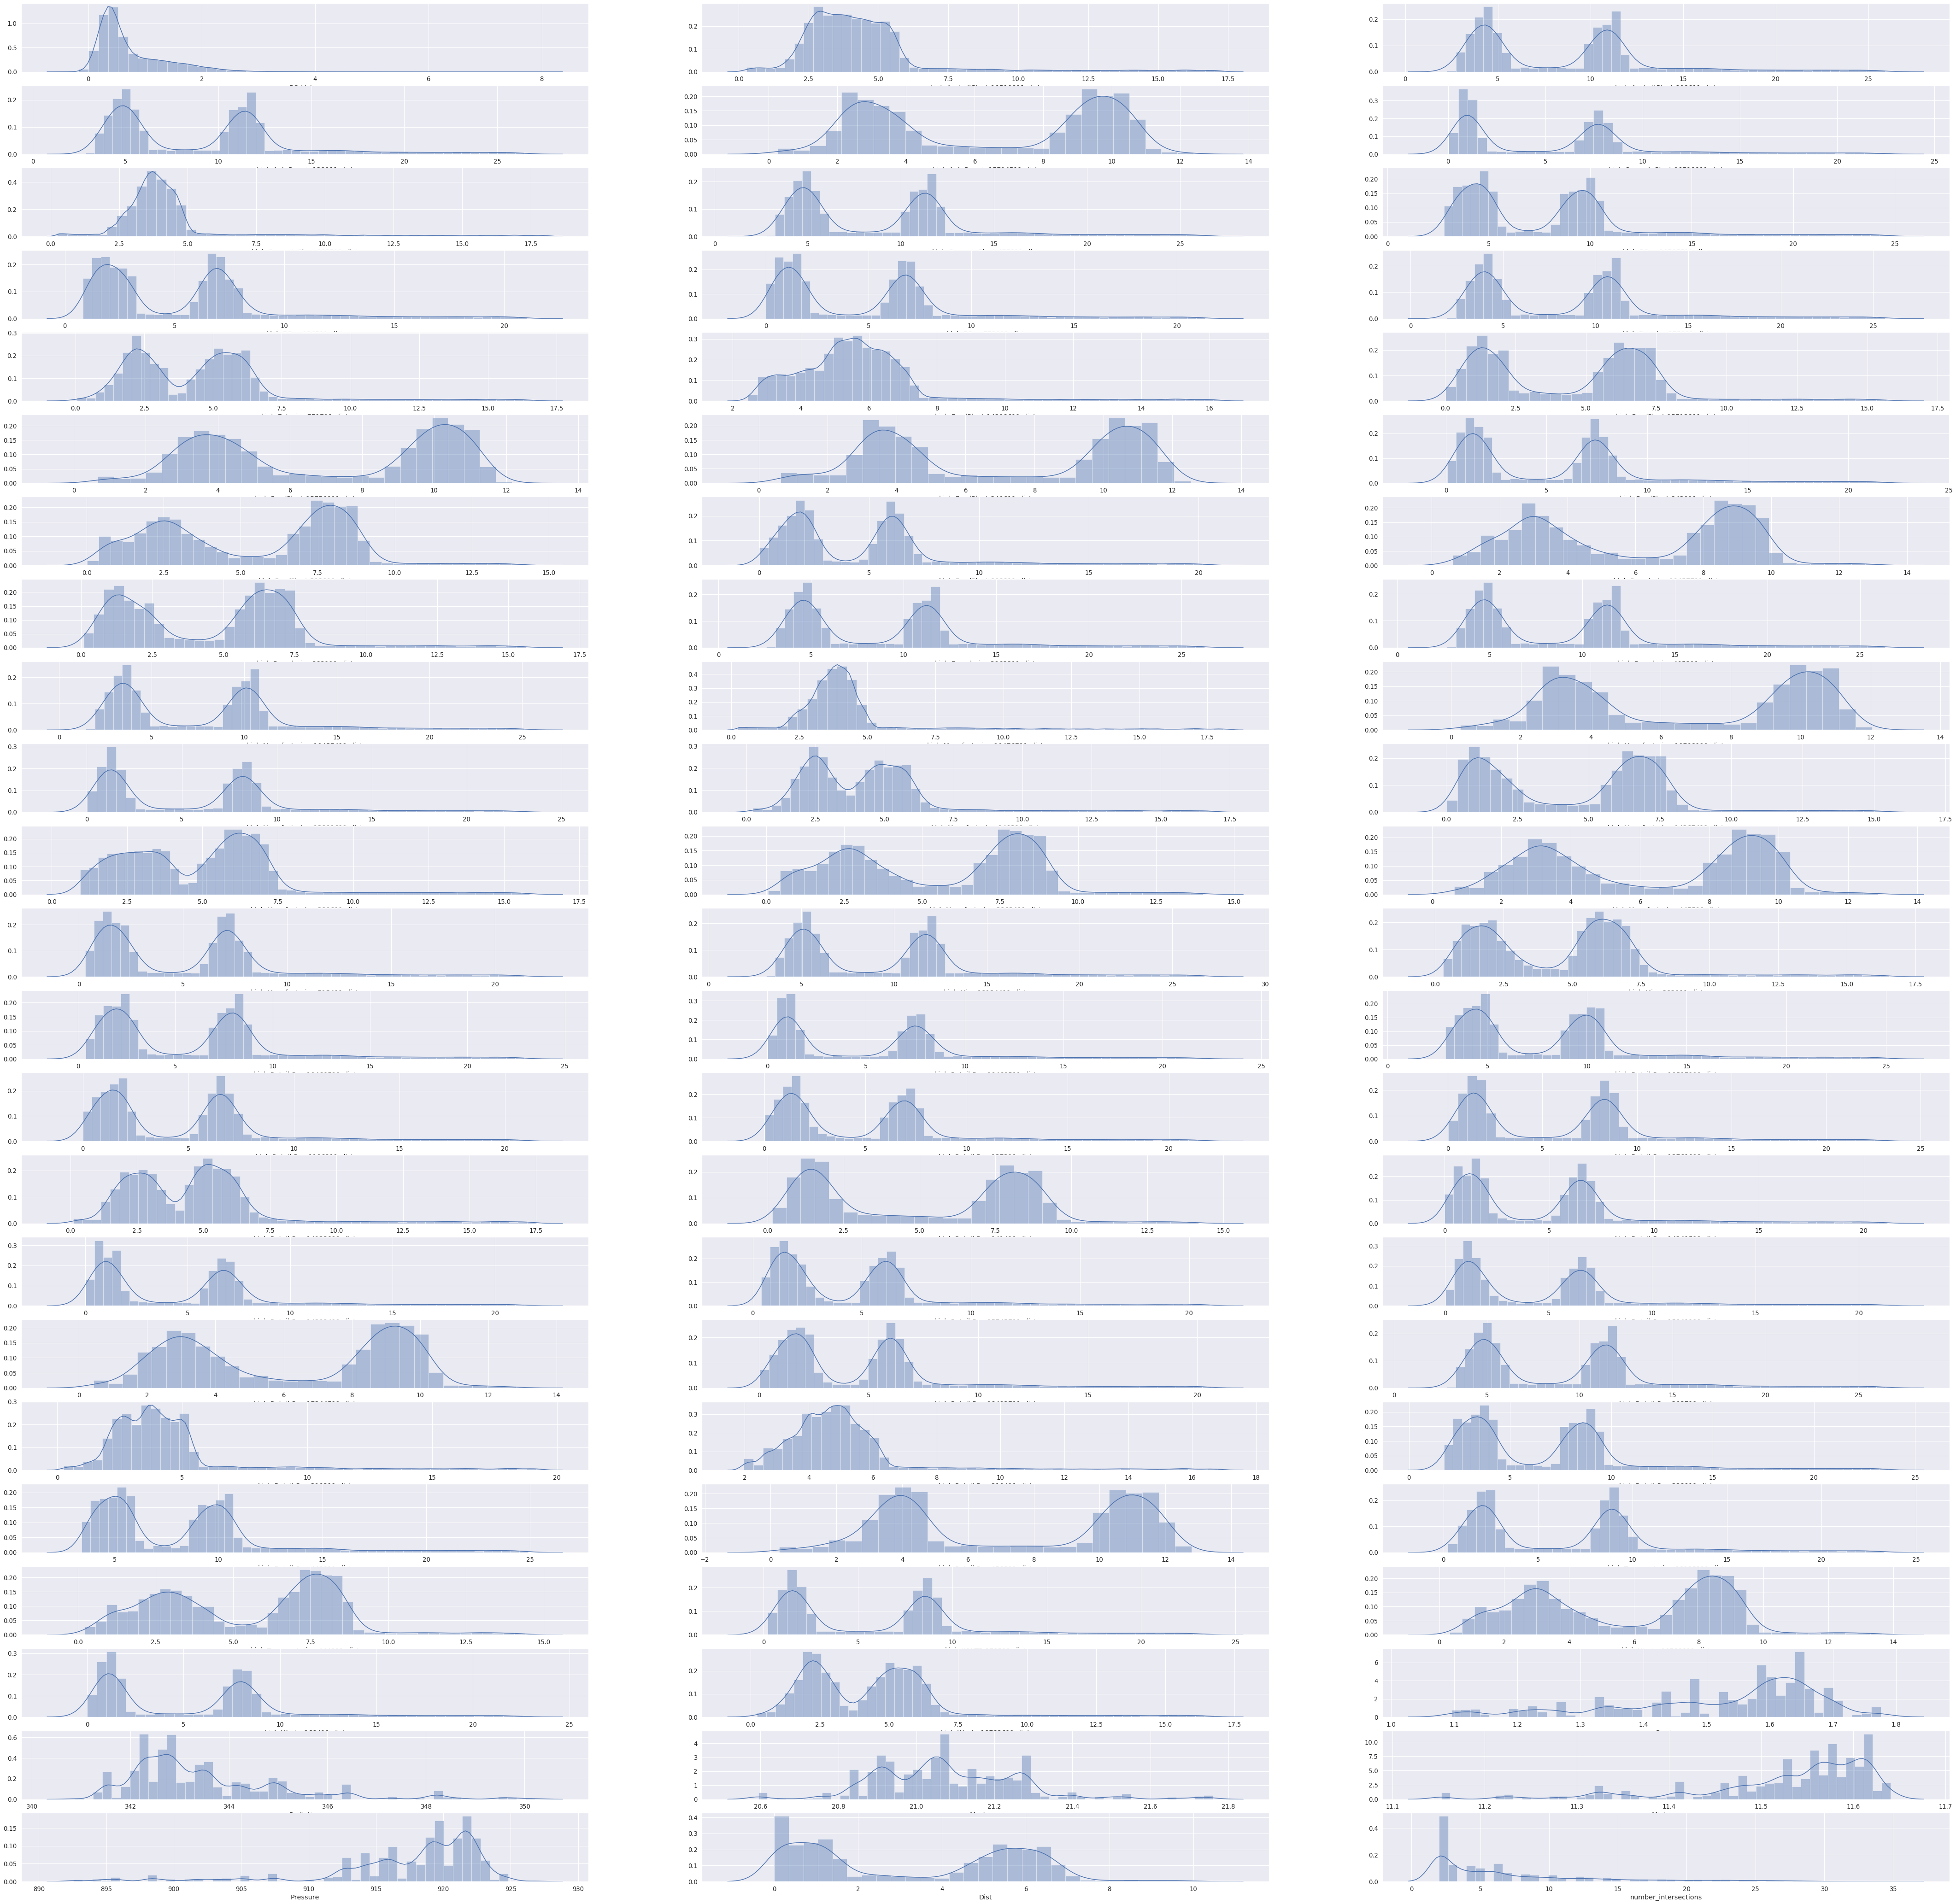

In [203]:
fig, axes = plt.subplots(nrows=23, ncols=3, figsize = (75,75))
for i, column in enumerate(BC.columns):
    sns.distplot(BC[column],ax=axes[i//3, i%3])

<b> <font size = 3 > <span style="color:darkorange"> NO2 dataset </b> </font> </span>

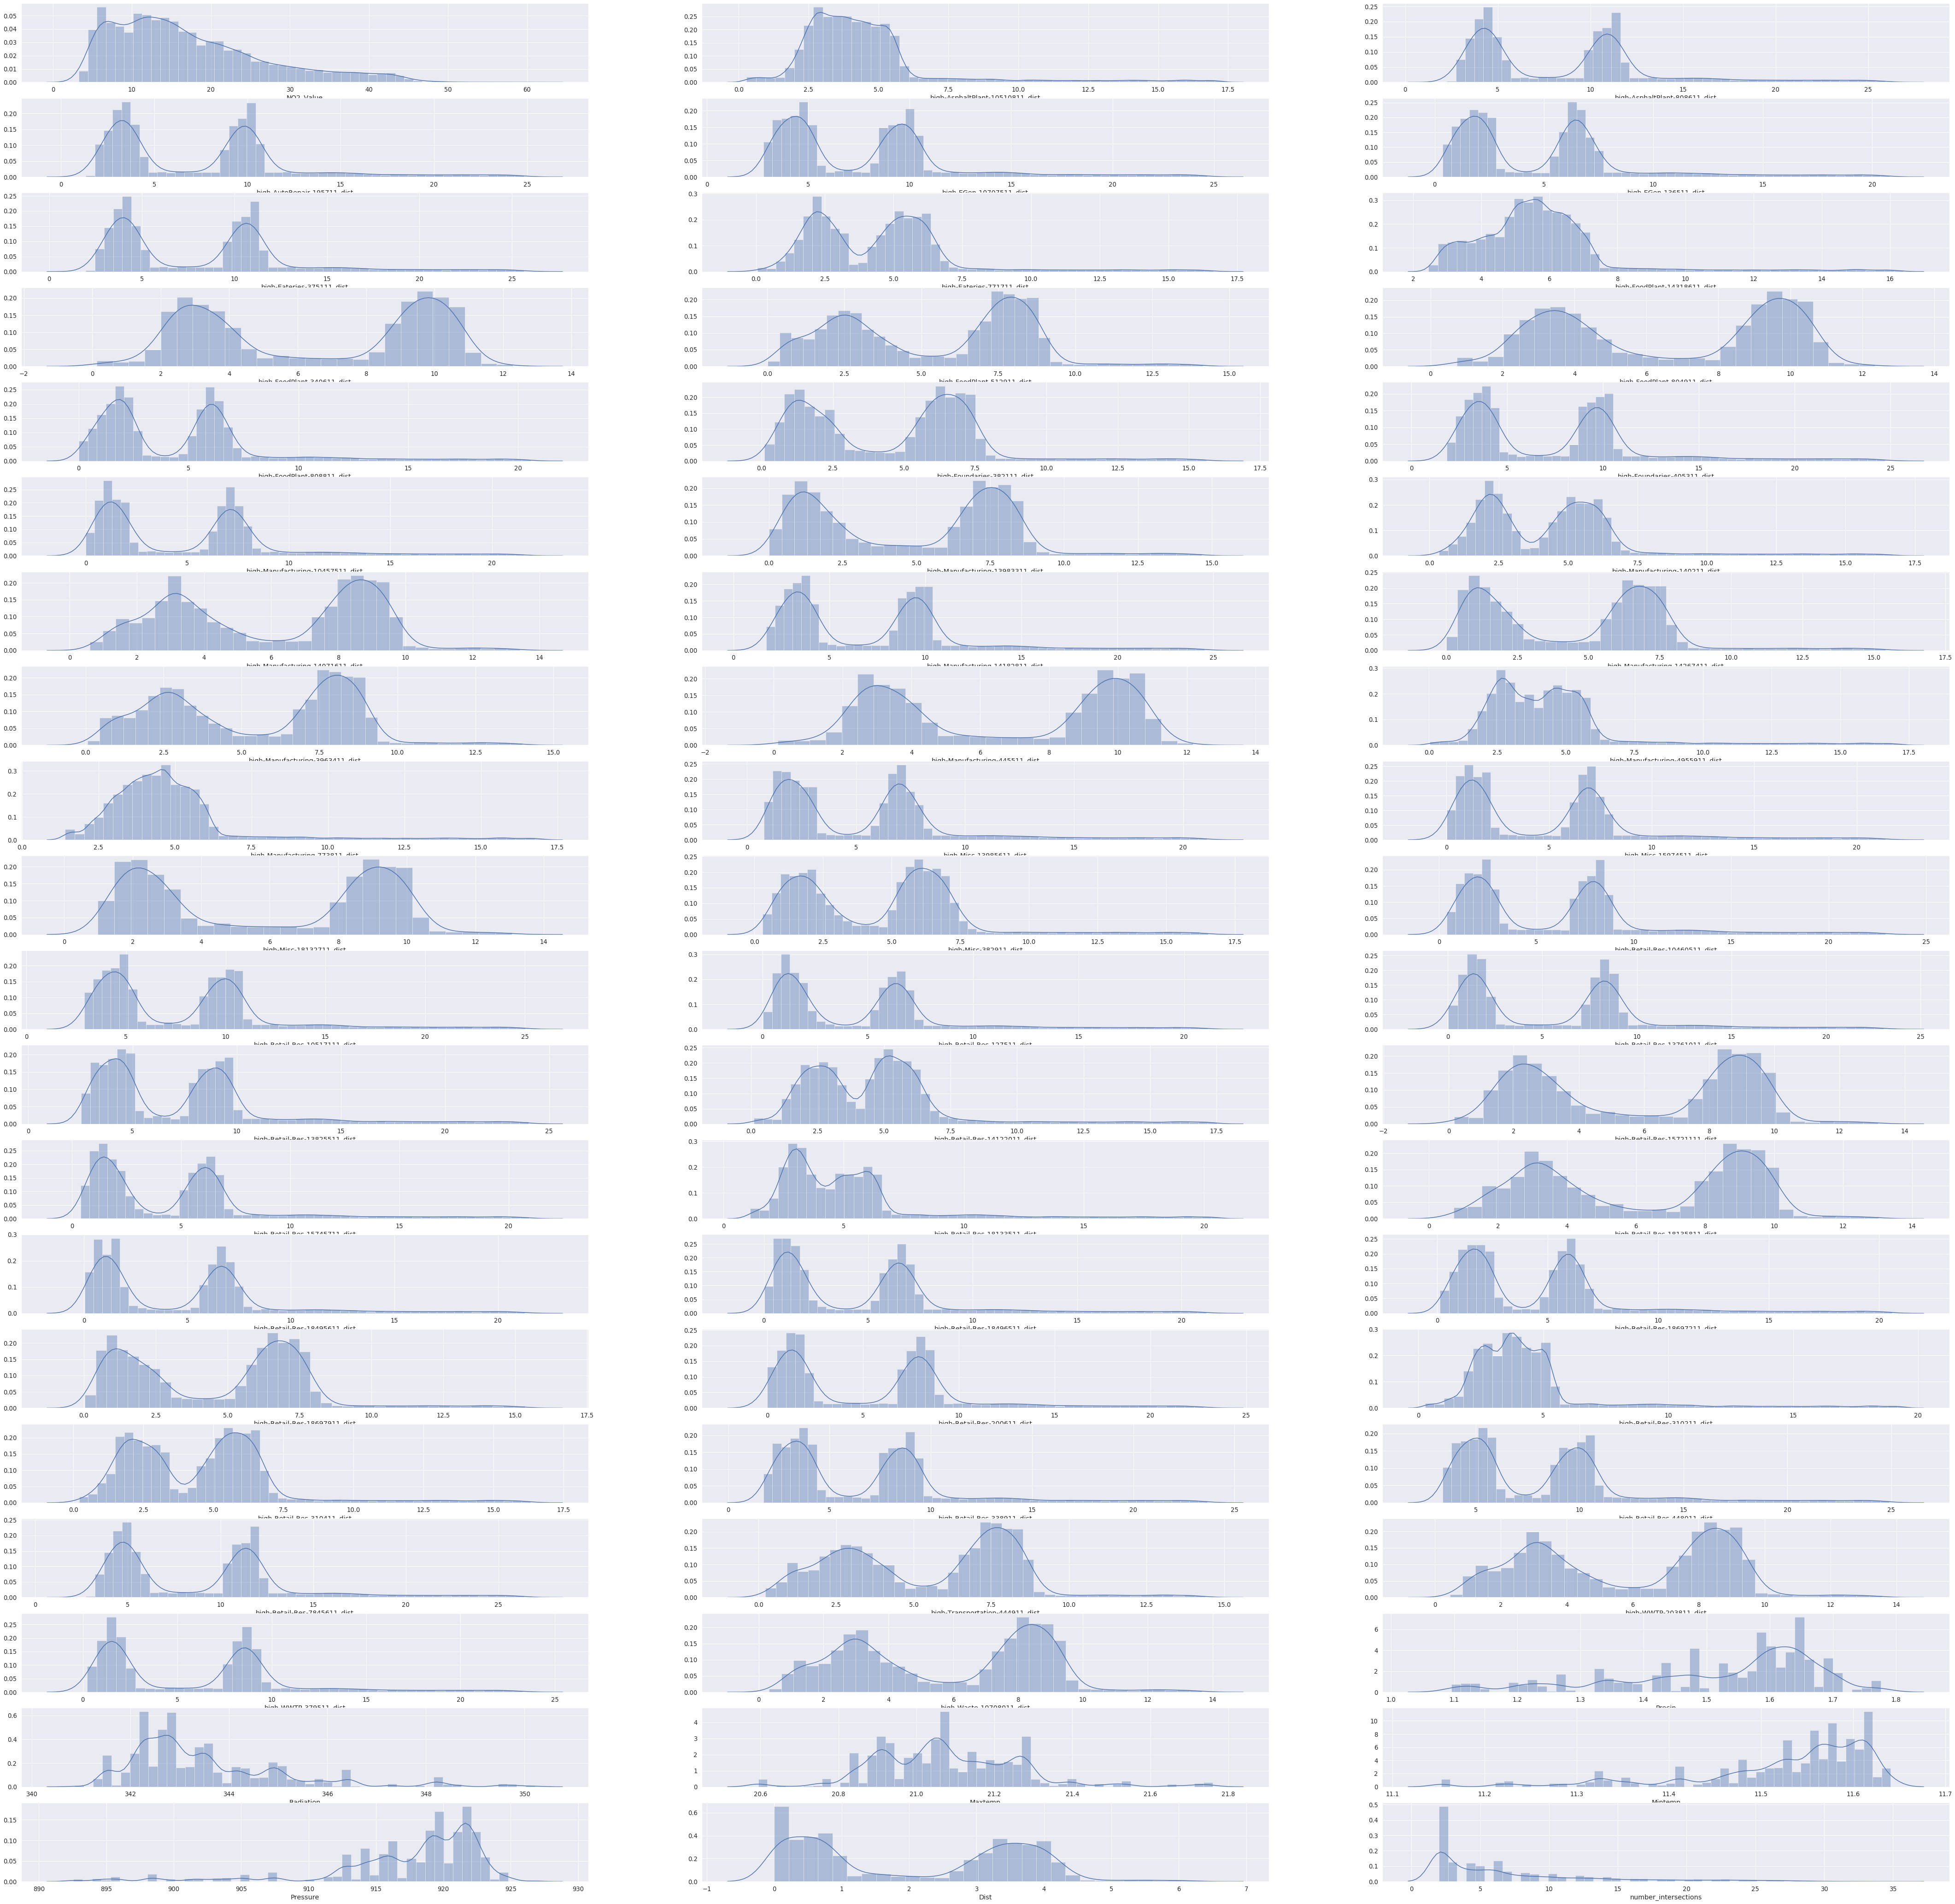

In [204]:
fig, axes = plt.subplots(nrows=20, ncols=3, figsize = (75,75))
for i, column in enumerate(NO2.columns):
    sns.distplot(NO2[column],ax=axes[i//3, i%3])

<div class="alert alert-block alert-success"> <b>Based on a histogram of all features in the BC and NO2 dataset, we see that none of the features follow a normal distribution. We use a box-cox transformation to fix skewed features</b></div>

<b> <font size = 4> <span style="color:blue"> Performing a box-cox transformation </b> </font> </span>

In [205]:
# First make a copy of each dataframe and apply transformation on copy
BC_df_transform = BC.copy()
NO2_df_transform = NO2.copy()

In [206]:
lambdas_BC = pd.DataFrame(columns = ['Column_name', "Lambda"])
lambdas_NO2 = pd.DataFrame(columns = ['Column_name', "Lambda"])
def boxcox_transform(df):
    lambdas_df = pd.DataFrame(columns = ['Column_name', "Lambda"])
    for column in df.columns:
        if df[column].min() <=0 :
            df[column] = df[column] - df[column].min() + 0.01
        df[column], boxcox_lambda = boxcox(df[column])
        lambdas_df = lambdas_df.append({'Column_name': column, 'Lambda':boxcox_lambda}, ignore_index = True)
    return lambdas_df

<b> <font size = 5> <span style="color:blue"> Store transformed data and corresponding Lambdas in a dataframe </b> </font> </span>

In [207]:
lambdas_BC = boxcox_transform(BC_df_transform)
lambbas_NO2 = boxcox_transform(NO2_df_transform)

<b> <font size = 5> <span style="color:darkorange"> Plotting a histogram of 'Normalized' dataset </b> </font> </span>

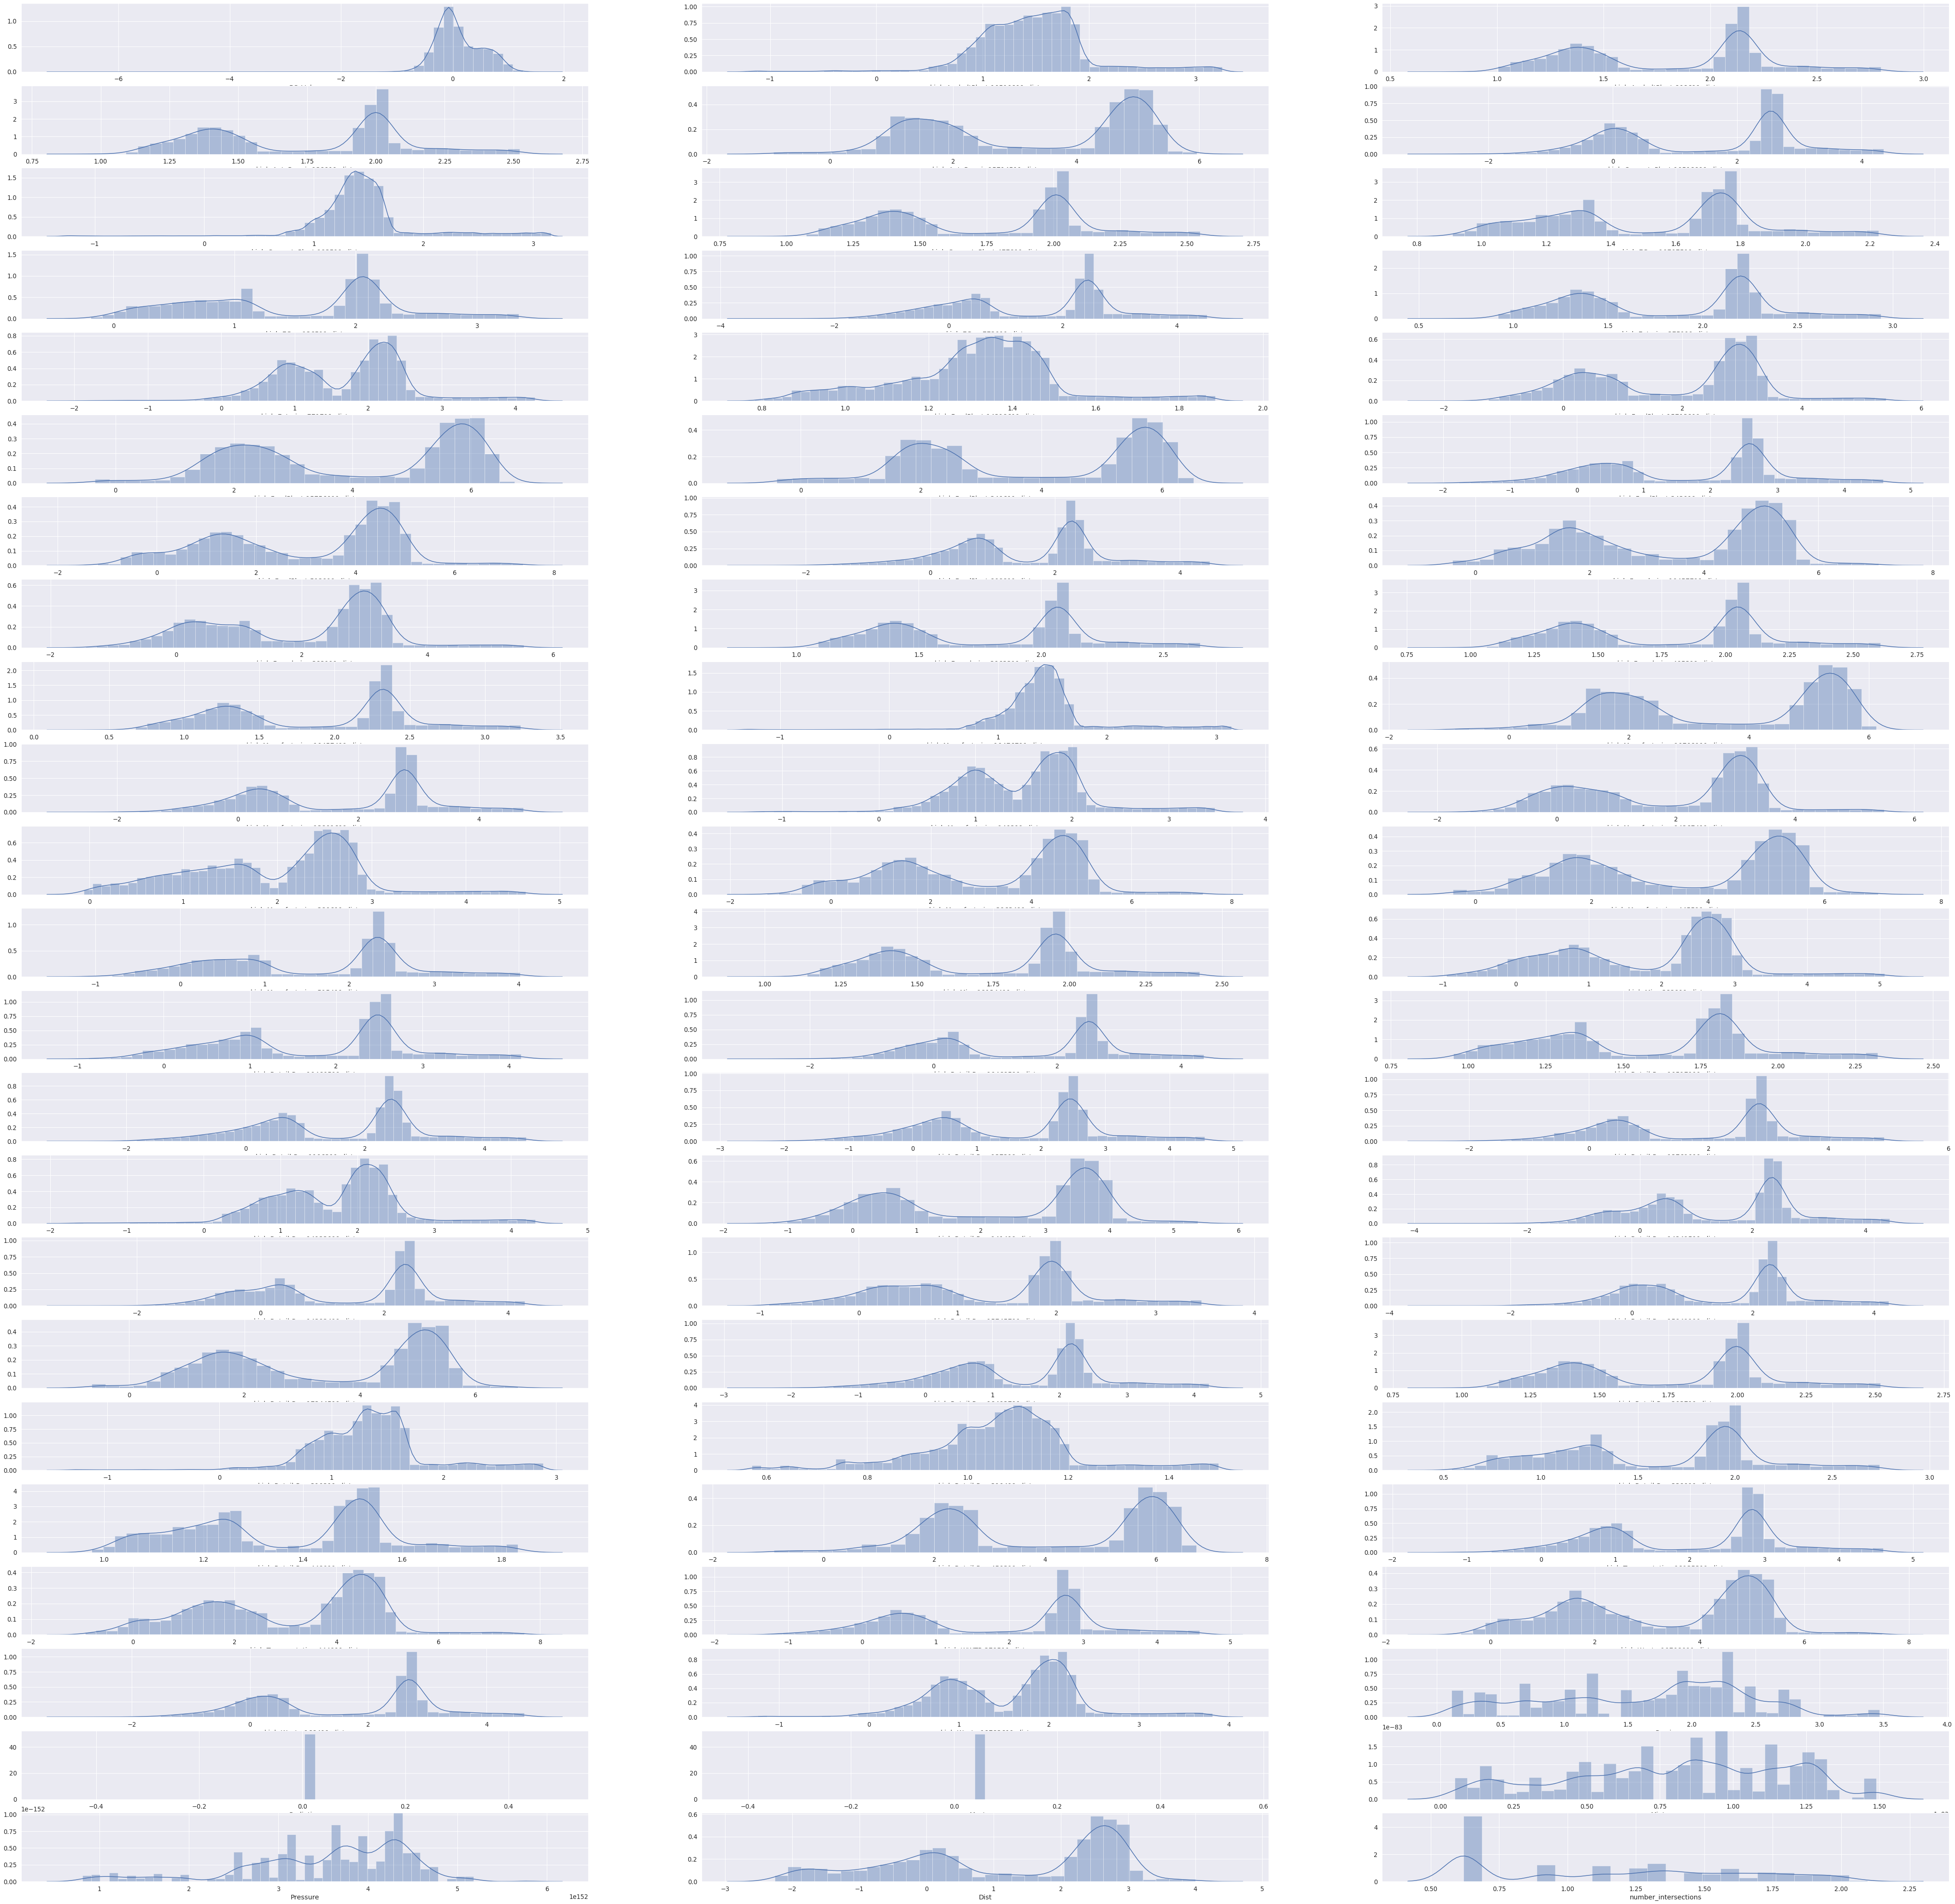

In [208]:
fig, axes = plt.subplots(nrows=23, ncols=3, figsize = (75,75))
for i, column in enumerate(BC_df_transform.columns):
    sns.distplot(BC_df_transform[column],ax=axes[i//3, i%3])

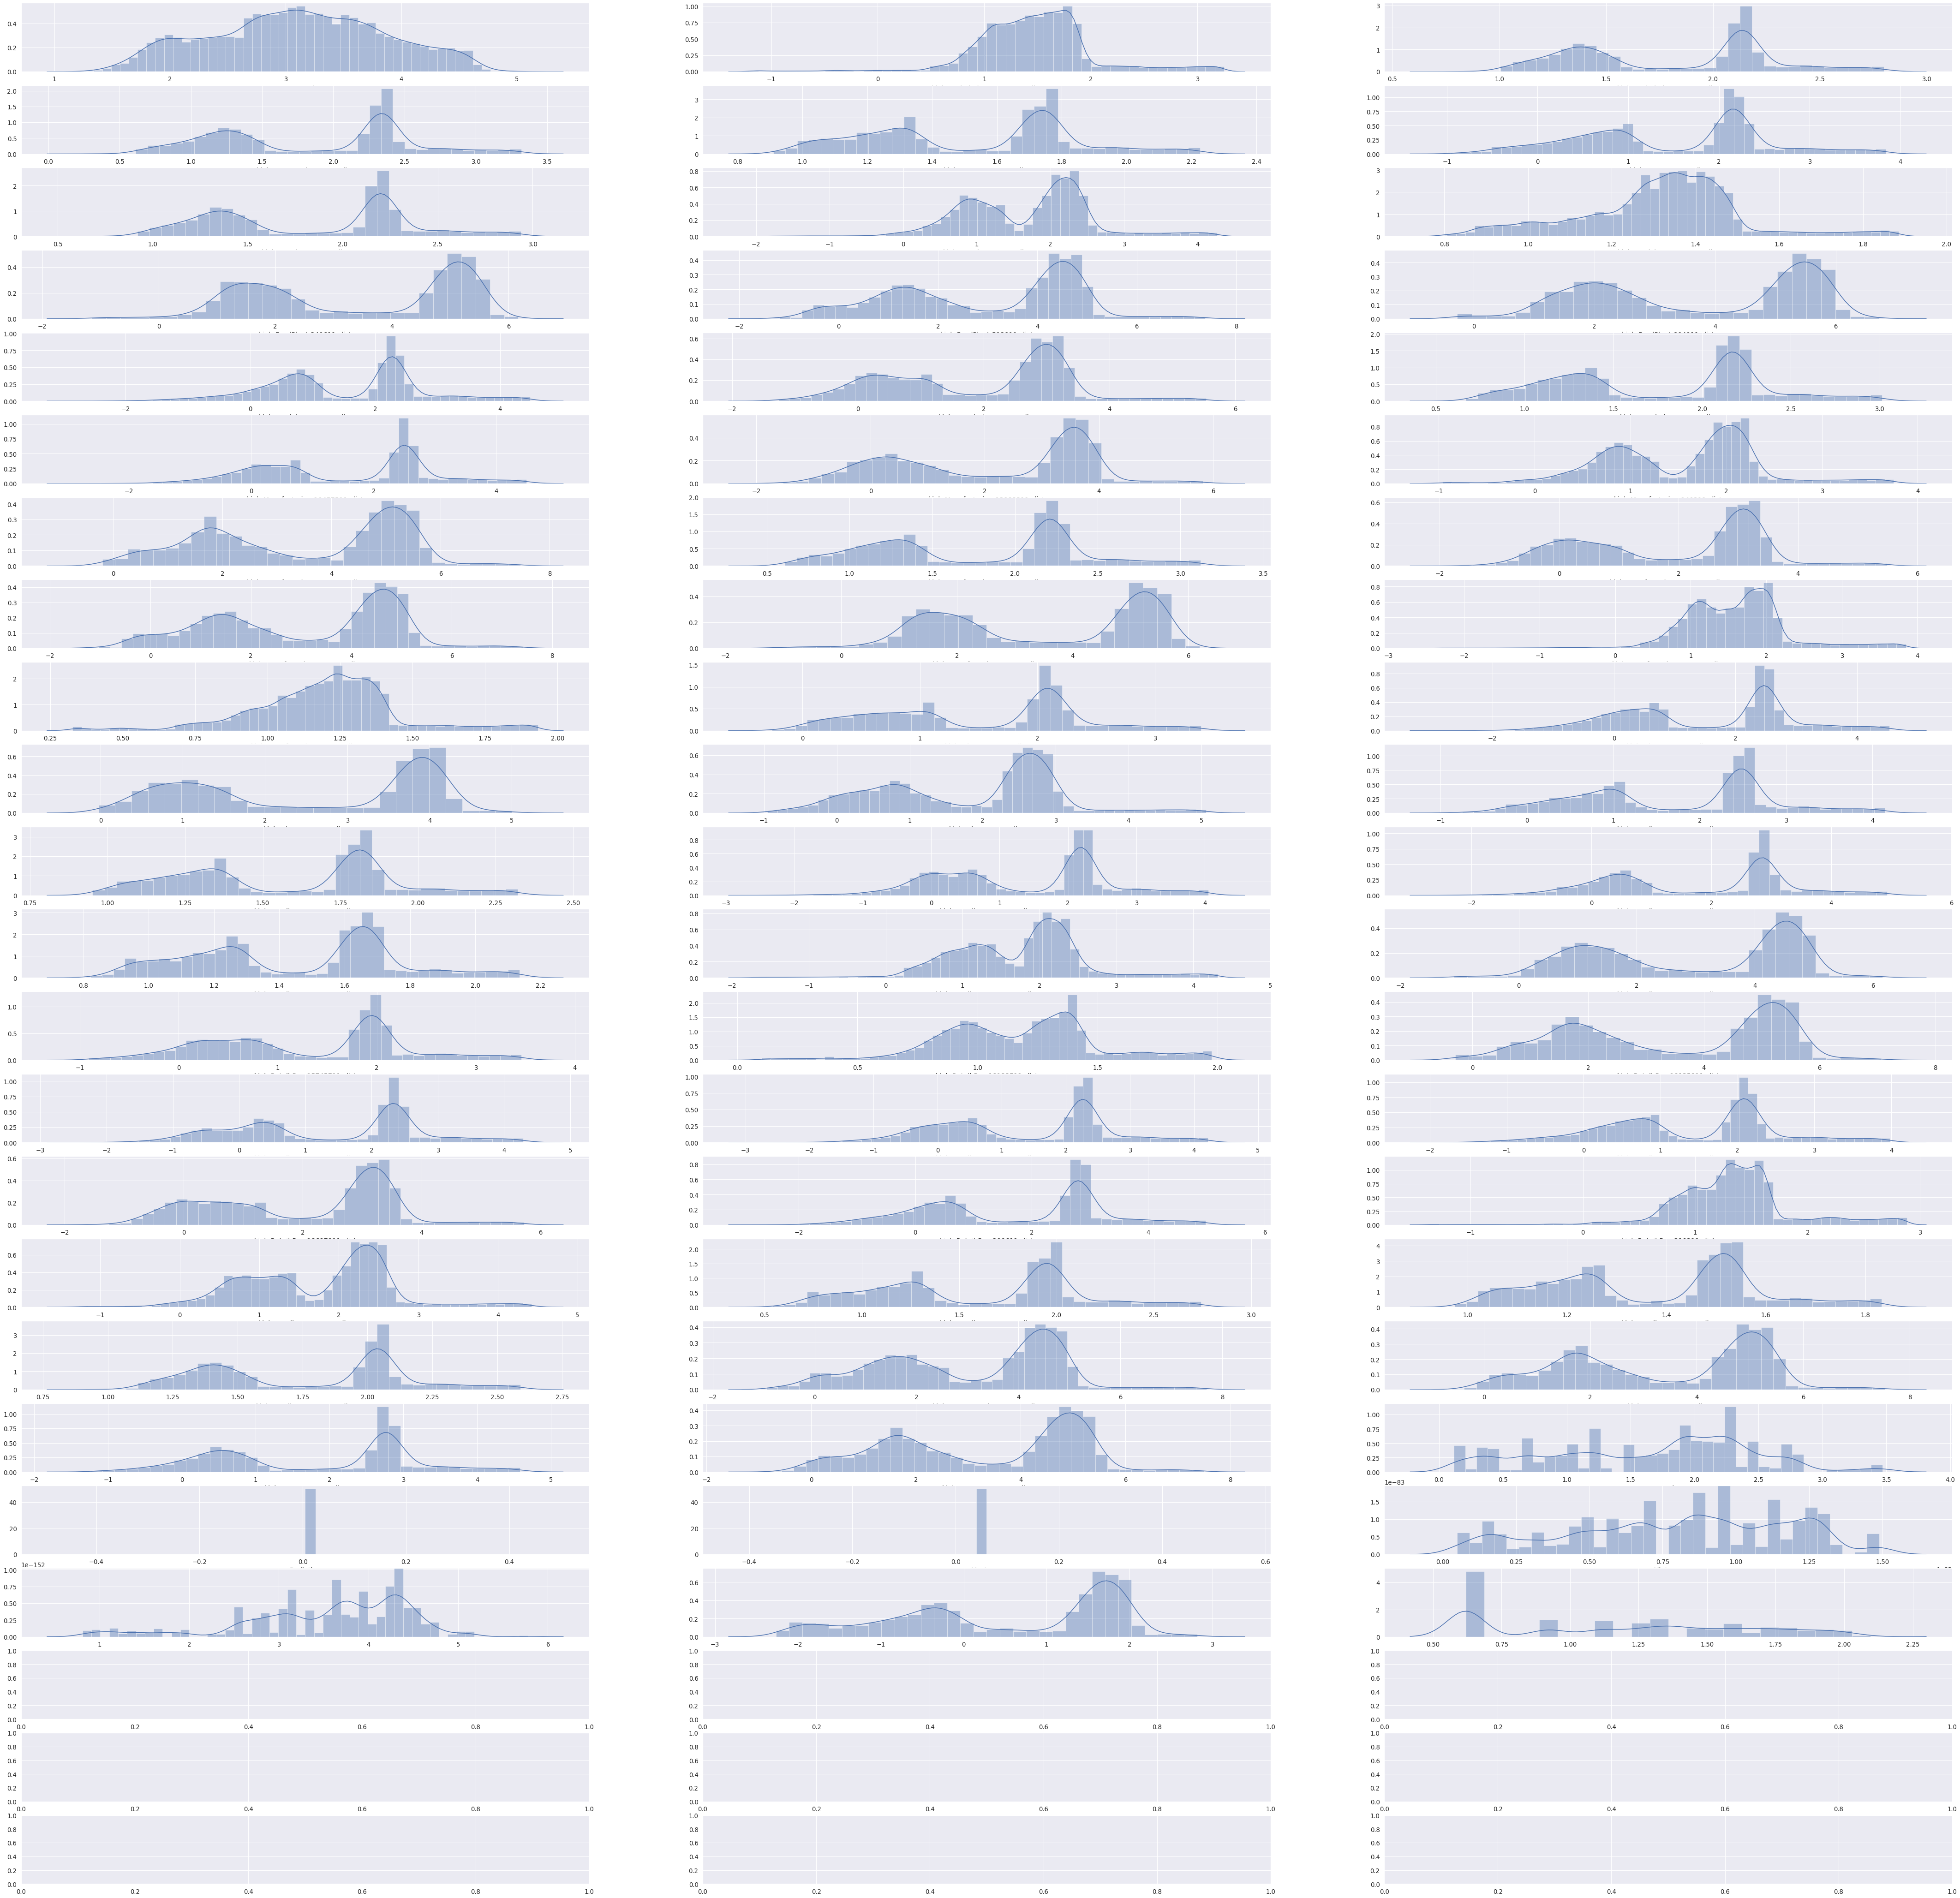

In [209]:
fig, axes = plt.subplots(nrows=23, ncols=3, figsize = (75,75))
for i, column in enumerate(NO2_df_transform.columns):
    sns.distplot(NO2_df_transform[column],ax=axes[i//3, i%3])

<b> <font size = 5> <span style="color:blue"> Recreate the dataframes with normalized X and Y, and standardize the data </b> </font> </span>

In [210]:
#BC Dataset
y_BC_transformed = BC_df_transform[['BC_Value']]
X_BC_transformed = BC_df_transform.drop(columns = ['BC_Value'])
X_BC_transformed_scaled = pd.DataFrame(StandardScaler().fit_transform(X_BC_transformed), index = X_BC_transformed.index, columns = X_BC_transformed.columns)
BC_df_transformed_scaled = y_BC_transformed.join(X_BC_transformed_scaled)

In [211]:
#NO2 Dataset
y_NO2_transformed = NO2_df_transform[['NO2_Value']]
X_NO2_transformed = NO2_df_transform.drop(columns = ['NO2_Value'])
X_NO2_transformed_scaled = pd.DataFrame(StandardScaler().fit_transform(X_NO2_transformed), index = X_NO2_transformed.index, columns = X_NO2_transformed.columns)
NO2_df_transformed_scaled = y_NO2_transformed.join(X_NO2_transformed_scaled)

<b> <font size = 5> <span style="color:green"> Define function to create inputs to R2_VIF function for BC </b> </font> </span>

In [212]:
def create_inputs_R2_vif_func_BC(X, y):
    #Calculate R2_VIF scores for training set and identify features
    input_df = pd.concat([y, X], axis = 1)
    #Update column name for X_train_BC to be of format Q('Column Name')
    output_featurelist_BC = []

    for feature_name in X.columns:
        output_featurelist_BC.append("Q('" + feature_name + "')")
    output_features_BC = ' + '.join(output_featurelist_BC)

    #  get y and X dataframes based on this regression:
    y_df, X_df = dmatrices('BC_Value ~' + output_features_BC, input_df, return_type='dataframe')
    X_df.drop(X_df.columns[0], axis = 1, inplace = True)
    return X_df, input_df


<b> <font size = 5> <span style="color:green"> Define function to create inputs to R2_VIF function for NO2 </b> </font> </span>

In [213]:
def create_inputs_R2_vif_func_NO2(X, y):
    #Calculate R2_VIF scores for training set and identify features
    input_df = pd.concat([y, X], axis = 1)
    #Update column name for X_train_NO2 to be of format Q('Column Name')
    output_featurelist_NO2 = []

    for feature_name in X.columns:
        output_featurelist_NO2.append("Q('" + feature_name + "')")
    output_features_NO2 = ' + '.join(output_featurelist_NO2)

    #  get y and X dataframes based on this regression:
    y_df, X_df = dmatrices('NO2_Value ~' + output_features_NO2, input_df, return_type='dataframe')
    X_df.drop(X_df.columns[0], axis = 1, inplace = True)
    return X_df, input_df


<b> <font size = 5> <span style="color:green"> Define function to optimize for max R2 and low VIF scores </b> </font> </span>

In [214]:
## In this function, you pass the features, feature_df in the format Q(' ') and the entire dataframe with scaled values
## Input parameters are as follows
## feature_df = dataframe of all features i.e. X variables
## target_str = 'string' either 'BC_Value' or 'NO2_Value'
## df = dataframe of X and y

def calculate_R2_vif(feature_df, target_str, df):
    vif_score = []
    vif_df = pd.DataFrame()

    thresh = 10
    output = pd.DataFrame()
    output_featurelist = []
    max_R2 = 0
    k = feature_df.shape[1]
    first_feature = None
    for column in df.columns[1:]:
        r2 = sm.OLS(df[target_str], df[column]).fit().rsquared
        if r2 > max_R2:
            max_R2 = r2
            first_feature = column
    output_featurelist.append("Q('" + first_feature + "')")
    print(output_featurelist)
    
    for i in range(1,k):
        if (df.columns[i] == first_feature):
            continue
        
        output_featurelist.append(feature_df.columns[i]) # Start with the first column we identified before, and append the next column with every iteration
        
        output_features = ' + '.join(output_featurelist)
        y, X = dmatrices(target_str + '~' + output_features, df, return_type='dataframe') #Create matrix each time a column is appended

       
        #Set should drop feature as False initially
        shouldDropFeature = False

        #Check if R2 for the new model is greater than the max_R2

        if (sm.OLS(y,X).fit().rsquared) > max_R2:
            max_R2 = sm.OLS(y,X).fit().rsquared
            # For each X, calculate VIF and save in dataframe
            vif = [variance_inflation_factor(X.values, j) for j in range(X.shape[1])] #Calculate VIF score for each model
            if np.amax(vif) > thresh:    
                shouldDropFeature = True
        else:
            shouldDropFeature = True

        #print(output_featurelist)
        if shouldDropFeature:
            # Drop latest feature if VIF is > 10 OR r^2 < max r^2 for any feature after adding latest feature
            output_featurelist = output_featurelist[:-1]
            #print(output_featurelist)
            
    # Create final feature list    
    final_output_featurelist = output_featurelist
    final_output_features = ' + '.join(final_output_featurelist)

    
    #Recalculate X and Y for final feature list
    y, X = dmatrices(target_str +  '~' + final_output_features, df, return_type='dataframe')
    #Estimate VIF score for final feature list
    vif_df["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 
    
    vif_df["features"] = X.columns
    X.drop(columns = ['Intercept'], inplace=True)

    #Fit an OLS model for the final features that are selected and return summary statistics, VIF scores (This has to happen prior to VIF check)
    vif_ols_model = sm.OLS(y, X)
    vif_ols_results = vif_ols_model.fit()
    return vif_df, vif_ols_results.summary()

        

<b> <font size = 5> <span style="color:darkorange"> Lasso Regularization with Gridsearch </b> </font> </span>

In [215]:
# First define a function to calculate scores for a model

def get_cv_scores(model, X_train, y_train):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=10,
                             scoring='r2')
    
    return('CV Mean: ', np.mean(scores), 'STD: ', np.std(scores))


<b> <font size = 4> <span style="color:darkorange"> BC dataset
</b> </font> </span>

In [216]:
# First set up the test-train split
X_train_BC, X_test_BC, y_train_BC, y_test_BC = train_test_split(X_BC_transformed_scaled, y_BC_transformed, test_size=0.30, random_state=0)

In [217]:
# Train model with default alpha=1
lasso_BC = Lasso(alpha=1).fit(X_train_BC, y_train_BC)

# get cross val scores
get_cv_scores(lasso_BC, X_train_BC, y_train_BC)

('CV Mean: ', -0.0006961926159118059, 'STD: ', 0.0011057797886150414)

In [218]:
##Instantiate a Lasso Regularization model. Performe a LassoCV using 5-fold cross validation
lassoCV_BC = LassoCV(cv=5, alphas= None)

#Fit the model to BC X and y
lassoCV_BC.fit(X_train_BC, y_train_BC)

### Set the parameters
lasso_BC.set_params(alpha=lassoCV_BC.alpha_)

#Print the optimal valu for alpha that gives the best fit for training data
print("Best Alpha using LassoCV = ", lassoCV_BC.alpha_)


#Using this value of alpha to refit the model
lasso_BC.fit(X_train_BC, y_train_BC)


## Computing mean squared error on the test data
print("MSE on test data = ", mean_squared_error(y_test_BC, lasso_BC.predict(X_test_BC)))

## Best score using Lasso CV 
print("Best score using LassoCV: ", lasso_BC.score(X_test_BC, y_test_BC))

#Estimate model coefficients. Coefficient of zero indicates that feature can be dropped
coef_BC = pd.Series(lasso_BC.coef_, index = BC_features.columns)


Best Alpha using LassoCV =  0.00015274253372807208
MSE on test data =  0.07799639454945655
Best score using LassoCV:  0.5345421171448599


In [219]:
#Estimate model coefficients. Coefficient of zero indicates that feature can be dropped
coef_BC = pd.Series(lasso_BC.coef_, index = X_BC_transformed.columns)

Text(0.5, 1.0, 'Feature importance using Lasso Model for BC Dataset')

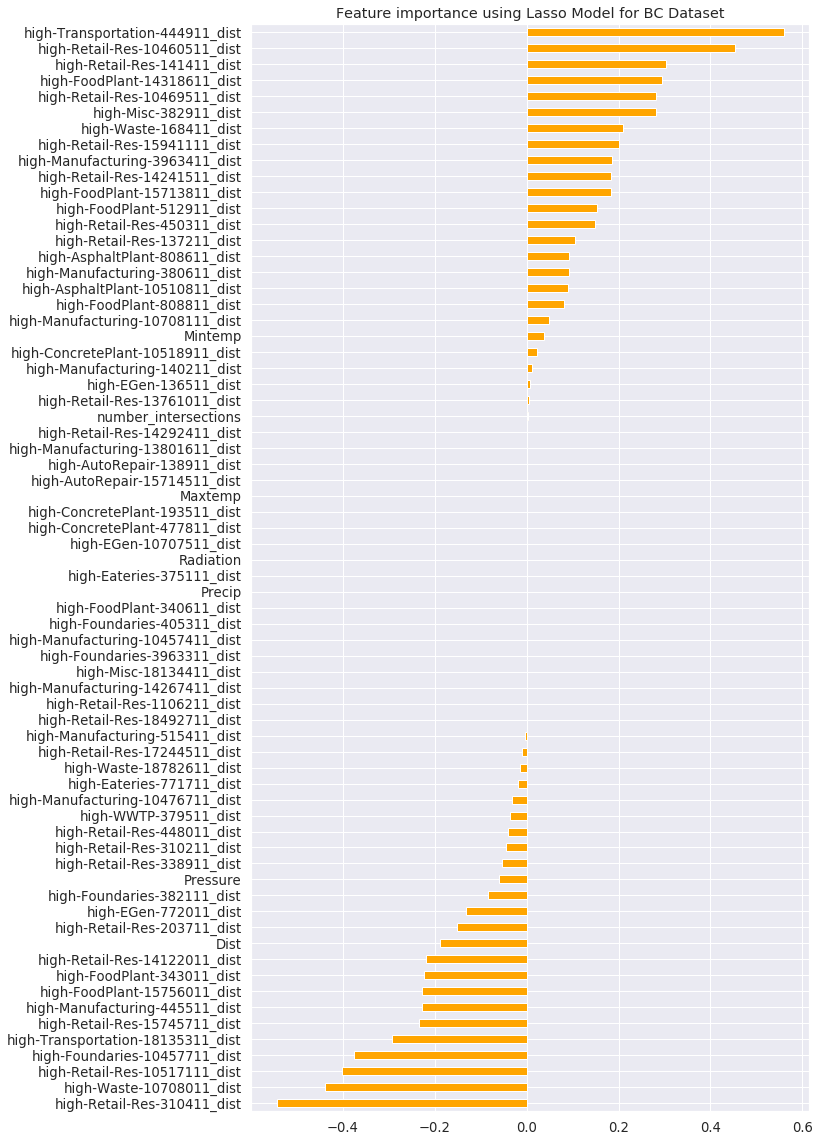

In [220]:
#Display feature importance using Lasso model

#Sort the features
imp_coef = coef_BC.sort_values()

# Plot feature importance in  bar graph
plt.figure(figsize = (10,20))
imp_coef.plot(kind = "barh", color='orange')
plt.title("Feature importance using Lasso Model for BC Dataset")

<b> <font size = 3> Calculate the VIF score for the features that were selected and applying the R2_VIF function on selected features </b> </font>

In [221]:
coef_BC[coef_BC !=0].index

Index(['high-AsphaltPlant-10510811_dist', 'high-AsphaltPlant-808611_dist',
       'high-ConcretePlant-10518911_dist', 'high-EGen-136511_dist',
       'high-EGen-772011_dist', 'high-Eateries-771711_dist',
       'high-FoodPlant-14318611_dist', 'high-FoodPlant-15713811_dist',
       'high-FoodPlant-15756011_dist', 'high-FoodPlant-343011_dist',
       'high-FoodPlant-512911_dist', 'high-FoodPlant-808811_dist',
       'high-Foundaries-10457711_dist', 'high-Foundaries-382111_dist',
       'high-Manufacturing-10476711_dist', 'high-Manufacturing-10708111_dist',
       'high-Manufacturing-140211_dist', 'high-Manufacturing-380611_dist',
       'high-Manufacturing-3963411_dist', 'high-Manufacturing-445511_dist',
       'high-Manufacturing-515411_dist', 'high-Misc-382911_dist',
       'high-Retail-Res-10460511_dist', 'high-Retail-Res-10469511_dist',
       'high-Retail-Res-10517111_dist', 'high-Retail-Res-137211_dist',
       'high-Retail-Res-13761011_dist', 'high-Retail-Res-14122011_dist',
     

In [222]:
output_featurelist = []
i=0
for feature_name in coef_BC.index:
    score = coef_BC[i]
    if score!=0:
        output_featurelist.append("Q('" + feature_name + "')")
    i += 1
output_features_BC_Lasso = ' + '.join(output_featurelist)

In [223]:
vif_BC_score_Lasso = []
#  get y and X dataframes based on this regression:
y_BC_vif_lasso, X_BC_vif_lasso = dmatrices('BC_Value ~' + output_features_BC_Lasso, BC_df_transformed_scaled, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif_BC_Lasso = pd.DataFrame()
vif_BC_Lasso["VIF Factor"] = [variance_inflation_factor(X_BC_vif_lasso.values, i) for i in range(X_BC_vif_lasso.shape[1])]
vif_BC_Lasso["features"] = X_BC_vif_lasso.columns
vif_BC_score_Lasso.append(vif_BC_Lasso.round(1))


In [224]:
vif_BC_score_Lasso

[    VIF Factor                                features
 0          1.0                               Intercept
 1       1307.7    Q('high-AsphaltPlant-10510811_dist')
 2    1944436.1      Q('high-AsphaltPlant-808611_dist')
 3        169.9   Q('high-ConcretePlant-10518911_dist')
 4       3536.0              Q('high-EGen-136511_dist')
 5        193.0              Q('high-EGen-772011_dist')
 6       3600.4          Q('high-Eateries-771711_dist')
 7      11072.9       Q('high-FoodPlant-14318611_dist')
 8        571.3       Q('high-FoodPlant-15713811_dist')
 9      53622.7       Q('high-FoodPlant-15756011_dist')
 10       675.9         Q('high-FoodPlant-343011_dist')
 11     48839.8         Q('high-FoodPlant-512911_dist')
 12       154.9         Q('high-FoodPlant-808811_dist')
 13    340886.7      Q('high-Foundaries-10457711_dist')
 14       809.5        Q('high-Foundaries-382111_dist')
 15       305.9   Q('high-Manufacturing-10476711_dist')
 16      7452.4   Q('high-Manufacturing-10708111

<b> <font size = 3> Apply the R2_VIF function to training and test data based on features selected by Lasso </b> </font>

In [225]:
cols_in_BC_lasso = list(coef_BC[coef_BC !=0].index)

In [226]:
#Drop the intercept column from X_BC_vif_lasso
X_BC_vif_lasso.drop(columns = ['Intercept'], inplace = True)

In [227]:
# Create a dataframe with the feature subset
BC_lasso_subset_vif  = pd.concat([BC['BC_Value'], BC[cols_in_BC_lasso]], axis = 1)

In [228]:
# Split dataframe into test and train data for R2/vif estimation
X_train_lasso_BC_vif, X_test_lasso_BC_vif, y_train_lasso_BC_vif, y_test_lasso_BC_vif = train_test_split(BC_lasso_subset_vif[cols_in_BC_lasso], BC_lasso_subset_vif['BC_Value'], test_size  = 0.30, random_state=0)

**Training data**


In [229]:
X_BC_vif_lasso_train, train_df = create_inputs_R2_vif_func_BC(X_train_lasso_BC_vif, y_train_lasso_BC_vif)

In [230]:
#R2 and VIF scores for Training data
calculate_R2_vif(X_BC_vif_lasso_train, 'BC_Value', train_df)

["Q('Mintemp')"]


(     VIF Factor      features
 0  13263.146002     Intercept
 1      1.000000  Q('Mintemp'), <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:               BC_Value   R-squared (uncentered):                   0.592
 Model:                            OLS   Adj. R-squared (uncentered):              0.592
 Method:                 Least Squares   F-statistic:                          2.180e+04
 Date:                Sun, 14 Jun 2020   Prob (F-statistic):                        0.00
 Time:                        23:16:11   Log-Likelihood:                         -13675.
 No. Observations:               15041   AIC:                                  2.735e+04
 Df Residuals:                   15040   BIC:                                  2.736e+04
 Df Model:                           1                                                  
 Covariance Type:            nonrobust                  

**Test data**


In [231]:
X_BC_vif_lasso_test, test_df = create_inputs_R2_vif_func_BC(X_test_lasso_BC_vif, y_test_lasso_BC_vif)

In [232]:
#R2 and VIF scores for Training data
calculate_R2_vif(X_BC_vif_lasso_test, 'BC_Value', test_df)

["Q('Mintemp')"]


(     VIF Factor      features
 0  13191.377213     Intercept
 1      1.000000  Q('Mintemp'), <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:               BC_Value   R-squared (uncentered):                   0.583
 Model:                            OLS   Adj. R-squared (uncentered):              0.583
 Method:                 Least Squares   F-statistic:                              9017.
 Date:                Sun, 14 Jun 2020   Prob (F-statistic):                        0.00
 Time:                        23:16:12   Log-Likelihood:                         -6054.4
 No. Observations:                6447   AIC:                                  1.211e+04
 Df Residuals:                    6446   BIC:                                  1.212e+04
 Df Model:                           1                                                  
 Covariance Type:            nonrobust                  

<div class="alert alert-block alert-success"> <b> Based on Lasso regularization and feature selection using stepfoward VIF approach and R2 estimation, minimum temperature seems to be the feature having the highest impact of BC concentration </b> </div>

<b> <font size = 3> Fit an OLS on all the features that were selected from Lasso </b> </font>

In [233]:
## Fit an OLS on the remaining features
BC_OLS_Lasso = sm.OLS(BC['BC_Value'], BC[coef_BC[coef_BC !=0].index])
BC_OLS_Lasso_results = BC_OLS_Lasso.fit() 
BC_OLS_Lasso_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               BC_Value   R-squared (uncentered):                   0.827
Model:                            OLS   Adj. R-squared (uncentered):              0.827
Method:                 Least Squares   F-statistic:                              2099.
Date:                Sun, 14 Jun 2020   Prob (F-statistic):                        0.00
Time:                        23:16:13   Log-Likelihood:                         -10408.
No. Observations:               21488   AIC:                                  2.091e+04
Df Residuals:                   21439   BIC:                                  2.131e+04
Df Model:                          49                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
high-AsphaltPlant-10510811_dist       4.0567      0.436      9.295      0.000       3.201       4.912
high-AsphaltPlant-808611_dist       -41.9524      3.269    -12.835      0.000     -48.359     -35.546
high-ConcretePlant-10518911_dist     -1.0495      0.095    -11.074      0.000      -1.235      -0.864
high-EGen-136511_dist                 4.4218      0.398     11.120      0.000       3.642       5.201
high-EGen-772011_dist                -0.9109      0.106     -8.580      0.000      -1.119      -0.703
high-Eateries-771711_dist             4.5713      0.659      6.935      0.000       3.279       5.863
high-FoodPlant-14318611_dist         15.2293      1.193     12.762      0.000      12.890      17.568
high-FoodPlant-15713811_dist         -0.3450      0.094     -3.684      0.000      -0.529      -0.161
high-FoodPlant-15756011_dist         -2.8975      0.524     -5.528      0.000      -3.925      -1.870
high-FoodPlant-343011_dist           -1.6590      0.178     -9.327      0.000      -2.008      -1.310
high-FoodPlant-512911_dist           -4.0435      0.833     -4.851      0.000      -5.677      -2.410
high-FoodPlant-808811_dist            0.5232      0.082      6.355      0.000       0.362       0.685
high-Foundaries-10457711_dist        -4.4442      1.363     -3.260      0.001      -7.116      -1.772
high-Foundaries-382111_dist           0.2678      0.113      2.372      0.018       0.047       0.489
high-Manufacturing-10476711_dist      3.1388      0.230     13.655      0.000       2.688       3.589
high-Manufacturing-10708111_dist      0.4735      0.197      2.408      0.016       0.088       0.859
high-Manufacturing-140211_dist        1.2277      0.833      1.474      0.140      -0.405       2.860
high-Manufacturing-380611_dist        2.2972      0.328      7.010      0.000       1.655       2.939
high-Manufacturing-3963411_dist      10.2872      1.892      5.437      0.000       6.579      13.996
high-Manufacturing-445511_dist       21.6157      4.852      4.455      0.000      12.106      31.125
high-Manufacturing-515411_dist       -1.4269      0.419     -3.407      0.001      -2.248      -0.606
high-Misc-382911_dist                 0.2670      0.038      7.094      0.000       0.193       0.341
high-Retail-Res-10460511_dist         1.4084      0.284      4.966      0.000       0.852       1.964
high-Retail-Res-10469511_dist         1.7054      0.103     16.523      0.000       1.503       1.908
high-Retail-Res-10517111_dist        35.1287      3.896      9.016      0.000      27.492      42.766
high-Retail-Res-137211_dist           0.8309      0.080     10.365      0.000       0.674       0.988
high-Retail-Res-13761011_d

Text(5, 5, 'R2 = 0.827')

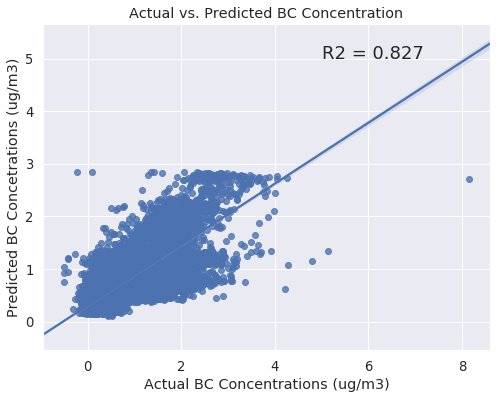

In [234]:
# Creating a plot of BC concentration vs predicted concentration using OLS
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)
plt.figure(figsize = (8,6))
ax = sns.regplot(x = BC.BC_Value, y = BC_OLS_Lasso_results.fittedvalues, fit_reg=True)
ax.set(xlabel = 'Actual BC Concentrations (ug/m3)', ylabel = 'Predicted BC Concetrations (ug/m3)')
plt.title('Actual vs. Predicted BC Concentration')
plt.text(5 , 5 ,"R2 = 0.827", fontsize = 18)


<div class="alert alert-block alert-success"> <b> This model does much better than the model that was developed just based on features that were not highly correlated. Predicted values for high concentration measurements are still pretty poor. The features selected by the Lasso model also have very high VIF scores.</b></div>

In [235]:
#Create a dataframe with BC value and selected columns from Lasso
Lasso_BC_df = BC[['BC_Value']].join(BC_features[coef_BC[coef_BC !=0].index])

In [236]:
Lasso_BC_corr = Lasso_BC_df.corr()
arr_corr_BC= Lasso_BC_corr.as_matrix()

module://ipykernel.pylab.backend_inline


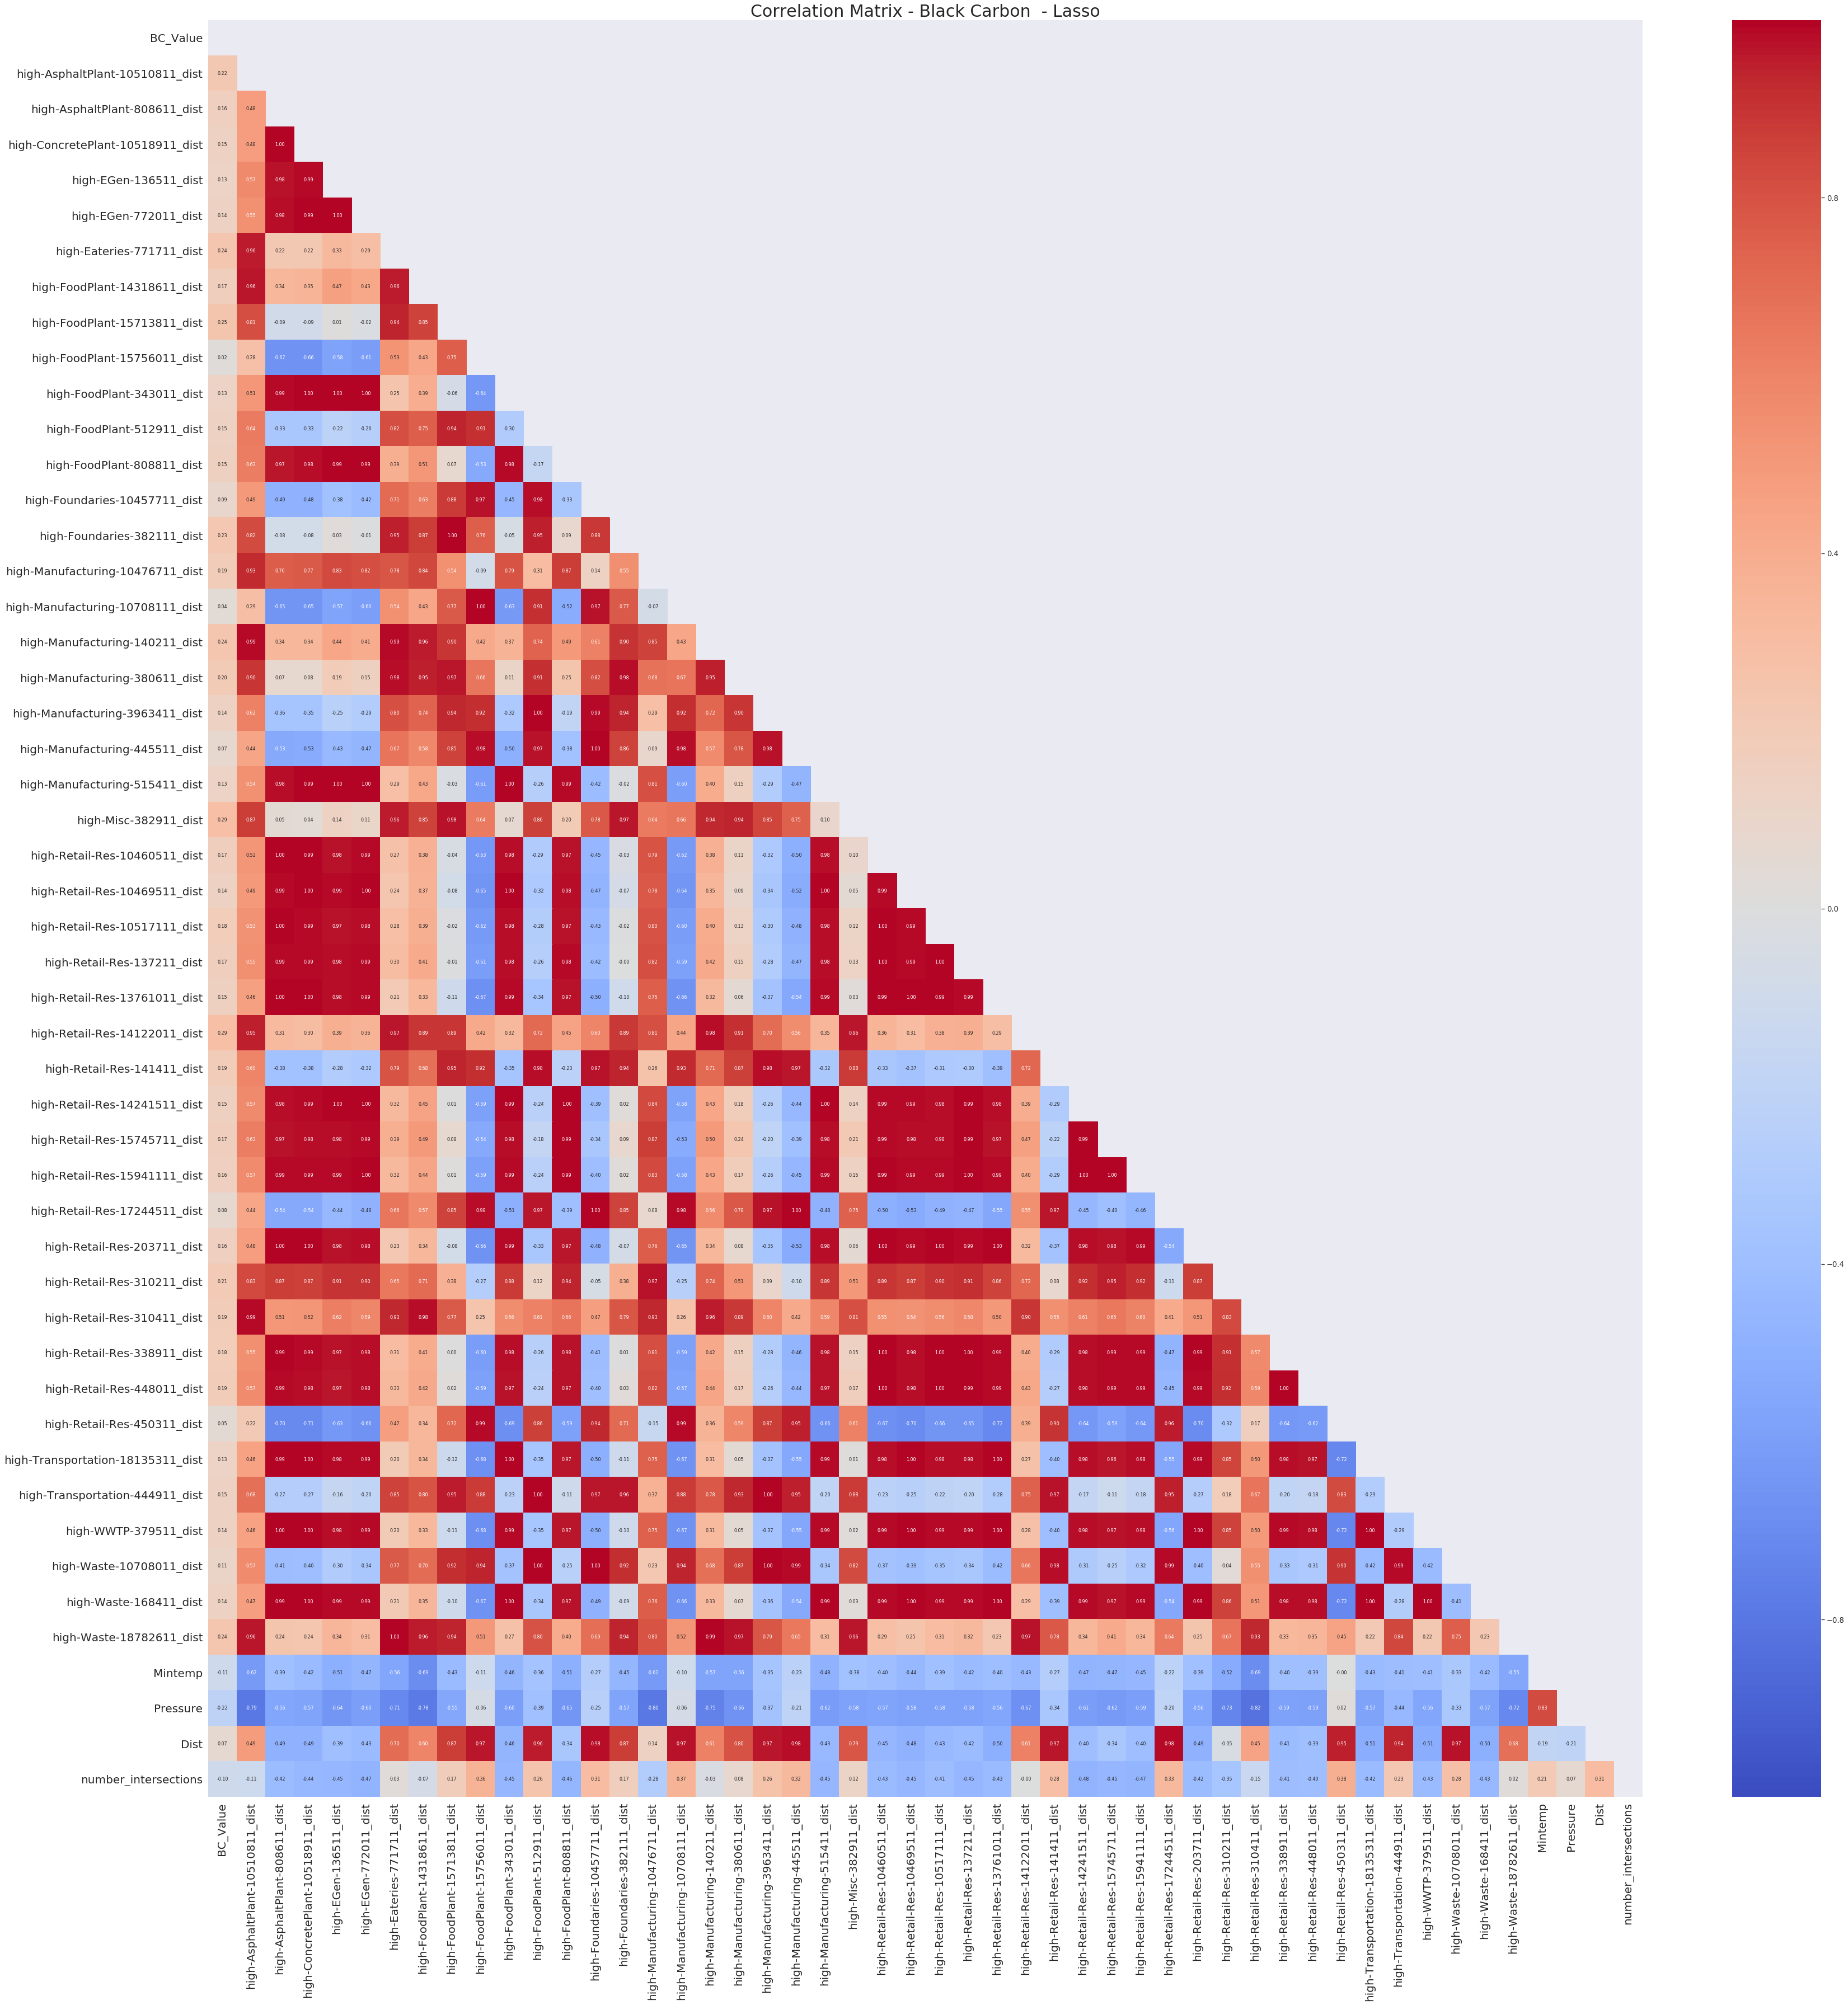

In [237]:
print(plt.get_backend())

# close any existing plots
plt.close("all")

# mask out the top triangle
arr_corr_BC[np.triu_indices_from(arr_corr_BC)] = np.nan

fig, ax = plt.subplots(figsize=(50, 50))

hm = sns.heatmap(arr_corr_BC, cbar=True, vmin = -1, vmax = 1, center = 0,
                 fmt='.2f', annot_kws={'size': 8}, annot=True, 
                 square=False, cmap = 'coolwarm')
#cmap=plt.cm.Blues

ticks = np.arange(Lasso_BC_corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(Lasso_BC_corr.columns, rotation=90, fontsize=20)
ax.set_yticks(ticks)
ax.set_yticklabels(Lasso_BC_corr.index, rotation=360, fontsize=20)

ax.set_title('Correlation Matrix - Black Carbon  - Lasso', fontsize  = 30)
plt.tight_layout()
#plt.savefig("corr_matrix_incl_anno_double.png", dpi=300)

<b> <font size = 4> <span style="color:darkorange">  NO2 dataset
</b> </font> </span>

In [238]:
# First set up the test-train split
X_train_NO2, X_test_NO2, y_train_NO2, y_test_NO2 = train_test_split(X_NO2_transformed_scaled, y_NO2_transformed, test_size=0.30, random_state=0)

In [239]:
# Train model with default alpha=1
lasso_NO2 = Lasso(alpha=1).fit(X_train_NO2, y_train_NO2)

# get cross val scores
get_cv_scores(lasso_NO2, X_train_NO2, y_train_NO2)

('CV Mean: ', -0.0005128911866175035, 'STD: ', 0.0006258654727031758)

In [240]:
##Instantiate a Lasso Regularization model. Performe a LassoCV using 5-fold cross validation
lassoCV_NO2 = LassoCV(cv=5, alphas= None)

#Fit the model to BC X and y
lassoCV_NO2.fit(X_train_NO2, y_train_NO2)

### Set the parameters
lasso_NO2.set_params(alpha=lassoCV_NO2.alpha_)

#Print the optimal valu for alpha that gives the best fit for training data
print("Best Alpha using LassoCV = ", lassoCV_NO2.alpha_)


#Using this value of alpha to refit the model
lasso_NO2.fit(X_train_NO2, y_train_NO2)


## Computing mean squared error on the test data
print("MSE on test data = ", mean_squared_error(y_test_NO2, lasso_NO2.predict(X_test_NO2)))

## Best score using Lasso CV 
print("Best score using LassoCV: ", lasso_NO2.score(X_test_NO2, y_test_NO2))

#Estimate model coefficients. Coefficient of zero indicates that feature can be dropped
coef_NO2 = pd.Series(lasso_NO2.coef_, index = NO2_features.columns)


Best Alpha using LassoCV =  0.00038952008419926016
MSE on test data =  0.20860434953284926
Best score using LassoCV:  0.6395777236551858


In [241]:
#Estimate model coefficients. Coefficient of zero indicates that feature can be dropped
coef_NO2 = pd.Series(lasso_NO2.coef_, index = X_NO2_transformed.columns)
coef_NO2

high-AsphaltPlant-10510811_dist     0.335146
high-AsphaltPlant-808611_dist      -0.849131
high-AutoRepair-195711_dist        -0.000000
high-EGen-10707511_dist            -0.000000
high-EGen-136511_dist               0.239457
high-Eateries-375111_dist          -0.178591
high-Eateries-771711_dist           0.025465
high-FoodPlant-14318611_dist       -0.000000
high-FoodPlant-340611_dist         -0.000000
high-FoodPlant-512911_dist          0.567633
high-FoodPlant-804911_dist         -0.610777
high-FoodPlant-808811_dist          0.003412
high-Foundaries-382111_dist        -0.000000
high-Foundaries-405311_dist        -0.000000
high-Manufacturing-10457511_dist    0.042460
high-Manufacturing-13983311_dist    0.407820
high-Manufacturing-140211_dist      0.189898
high-Manufacturing-14071611_dist   -0.252389
high-Manufacturing-14182811_dist   -0.000000
high-Manufacturing-14267411_dist    0.000754
high-Manufacturing-3963411_dist     0.014484
high-Manufacturing-445511_dist      0.000000
high-Manuf

Text(0.5, 1.0, 'Feature importance using Lasso Model for NO2 Dataset')

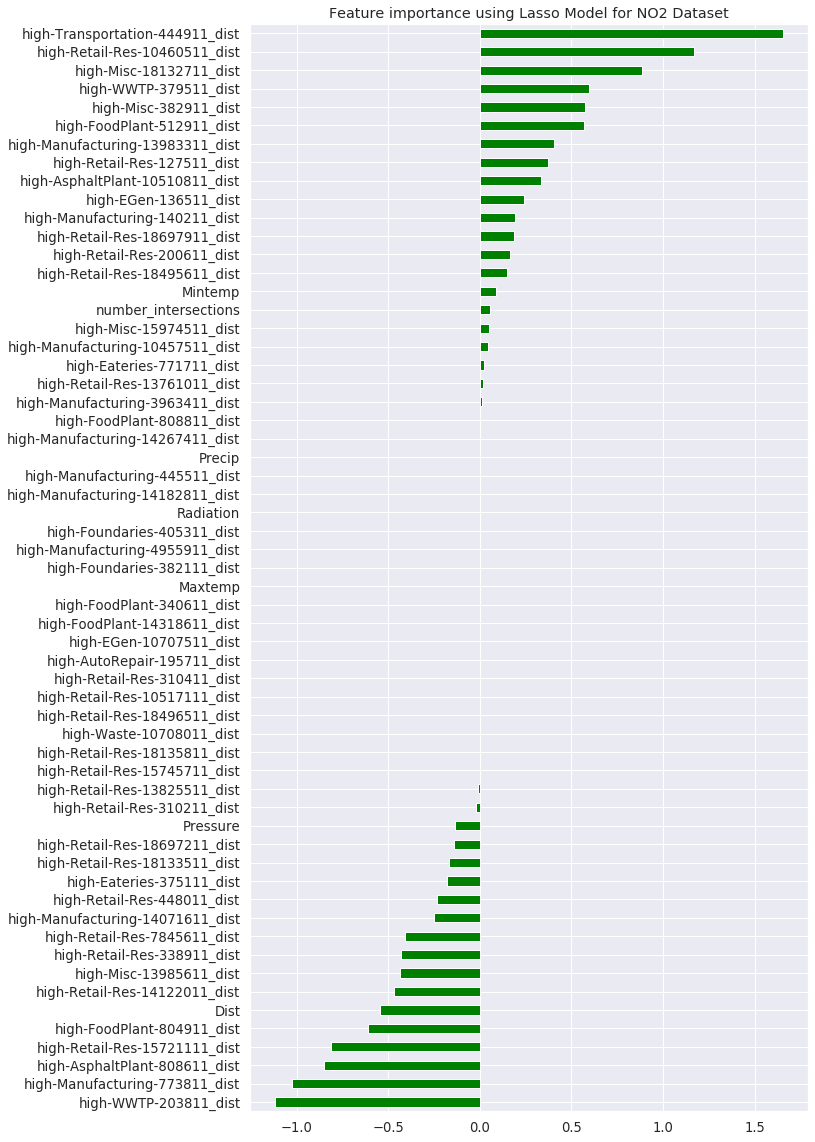

In [242]:
#Display feature importance using Lasso model

#Sort the features
imp_coef = coef_NO2.sort_values()

# Plot feature importance in  bar graph
plt.figure(figsize = (10,20))
imp_coef.plot(kind = "barh", color='green')
plt.title("Feature importance using Lasso Model for NO2 Dataset")

<b> <font size = 3> Calculate the VIF score for the features that were selected and applying the R2_VIF function on selected features </b> </font>

In [243]:
coef_NO2[coef_NO2 !=0].index

Index(['high-AsphaltPlant-10510811_dist', 'high-AsphaltPlant-808611_dist',
       'high-EGen-136511_dist', 'high-Eateries-375111_dist',
       'high-Eateries-771711_dist', 'high-FoodPlant-512911_dist',
       'high-FoodPlant-804911_dist', 'high-FoodPlant-808811_dist',
       'high-Manufacturing-10457511_dist', 'high-Manufacturing-13983311_dist',
       'high-Manufacturing-140211_dist', 'high-Manufacturing-14071611_dist',
       'high-Manufacturing-14267411_dist', 'high-Manufacturing-3963411_dist',
       'high-Manufacturing-773811_dist', 'high-Misc-13985611_dist',
       'high-Misc-15974511_dist', 'high-Misc-18132711_dist',
       'high-Misc-382911_dist', 'high-Retail-Res-10460511_dist',
       'high-Retail-Res-127511_dist', 'high-Retail-Res-13761011_dist',
       'high-Retail-Res-13825511_dist', 'high-Retail-Res-14122011_dist',
       'high-Retail-Res-15721111_dist', 'high-Retail-Res-18133511_dist',
       'high-Retail-Res-18495611_dist', 'high-Retail-Res-18697211_dist',
       'high-

In [244]:
output_featurelist = []
i=0
for feature_name in coef_NO2.index:
    score = coef_NO2[i]
    if score!=0:
        output_featurelist.append("Q('" + feature_name + "')")
    i += 1
output_features_NO2_Lasso = ' + '.join(output_featurelist)

In [245]:
vif_NO2_score_Lasso = []
#  get y and X dataframes based on this regression:
y_NO2_vif_lasso, X_NO2_vif_lasso = dmatrices('NO2_Value ~' + output_features_NO2_Lasso, NO2_df_transformed_scaled, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif_NO2_Lasso = pd.DataFrame()
vif_NO2_Lasso["VIF Factor"] = [variance_inflation_factor(X_NO2_vif_lasso.values, i) for i in range(X_NO2_vif_lasso.shape[1])]
vif_NO2_Lasso["features"] = X_NO2_vif_lasso.columns
vif_NO2_score_Lasso.append(vif_NO2_Lasso.round(1))


In [246]:
vif_NO2_score_Lasso

[      VIF Factor                               features
 0   1.000000e+00                              Intercept
 1   1.884000e+02   Q('high-AsphaltPlant-10510811_dist')
 2   2.239652e+09     Q('high-AsphaltPlant-808611_dist')
 3   8.798000e+02             Q('high-EGen-136511_dist')
 4   8.139847e+08         Q('high-Eateries-375111_dist')
 5   9.113000e+02         Q('high-Eateries-771711_dist')
 6   4.110200e+04        Q('high-FoodPlant-512911_dist')
 7   2.863810e+04        Q('high-FoodPlant-804911_dist')
 8   3.277000e+02        Q('high-FoodPlant-808811_dist')
 9   4.732000e+02  Q('high-Manufacturing-10457511_dist')
 10  2.718000e+02  Q('high-Manufacturing-13983311_dist')
 11  1.348100e+03    Q('high-Manufacturing-140211_dist')
 12  7.388007e+06  Q('high-Manufacturing-14071611_dist')
 13  6.975000e+02  Q('high-Manufacturing-14267411_dist')
 14  2.712277e+05   Q('high-Manufacturing-3963411_dist')
 15  4.146000e+02    Q('high-Manufacturing-773811_dist')
 16  1.045600e+03           Q('

<b> <font size = 3> Apply the R2_VIF function to training and test data based on features selected by Lasso </b> </font>

In [247]:
cols_in_NO2_lasso = list(coef_NO2[coef_NO2 !=0].index)

In [248]:
#Drop the intercept column from X_BC_vif_lasso
X_NO2_vif_lasso.drop(columns = ['Intercept'], inplace = True)

In [249]:
# Create a dataframe with the feature subset
NO2_lasso_subset_vif  = pd.concat([NO2['NO2_Value'], NO2[cols_in_NO2_lasso]], axis = 1)

In [250]:
# Split dataframe into test and train data for R2/vif estimation
X_train_lasso_NO2_vif, X_test_lasso_NO2_vif, y_train_lasso_NO2_vif, y_test_lasso_NO2_vif = train_test_split(NO2_lasso_subset_vif[cols_in_NO2_lasso], NO2_lasso_subset_vif['NO2_Value'], test_size  = 0.30, random_state=0)

**Training data**


In [251]:
X_NO2_vif_lasso_train, train_df = create_inputs_R2_vif_func_NO2(X_train_lasso_NO2_vif, y_train_lasso_NO2_vif)

In [252]:
#R2 and VIF scores for Training data
calculate_R2_vif(X_NO2_vif_lasso_train, 'NO2_Value', train_df)

["Q('Mintemp')"]


(     VIF Factor      features
 0  13263.146002     Intercept
 1      1.000000  Q('Mintemp'), <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:              NO2_Value   R-squared (uncentered):                   0.759
 Model:                            OLS   Adj. R-squared (uncentered):              0.759
 Method:                 Least Squares   F-statistic:                          4.726e+04
 Date:                Sun, 14 Jun 2020   Prob (F-statistic):                        0.00
 Time:                        23:16:28   Log-Likelihood:                         -55464.
 No. Observations:               15041   AIC:                                  1.109e+05
 Df Residuals:                   15040   BIC:                                  1.109e+05
 Df Model:                           1                                                  
 Covariance Type:            nonrobust                  

**Test data**


In [253]:
X_NO2_vif_lasso_test, test_df = create_inputs_R2_vif_func_NO2(X_test_lasso_NO2_vif, y_test_lasso_NO2_vif)

In [254]:
#R2 and VIF scores for Training data
calculate_R2_vif(X_NO2_vif_lasso_test, 'NO2_Value', test_df)

["Q('Mintemp')"]


(     VIF Factor      features
 0  13191.377213     Intercept
 1      1.000000  Q('Mintemp'), <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:              NO2_Value   R-squared (uncentered):                   0.756
 Model:                            OLS   Adj. R-squared (uncentered):              0.756
 Method:                 Least Squares   F-statistic:                          1.994e+04
 Date:                Sun, 14 Jun 2020   Prob (F-statistic):                        0.00
 Time:                        23:16:29   Log-Likelihood:                         -23884.
 No. Observations:                6447   AIC:                                  4.777e+04
 Df Residuals:                    6446   BIC:                                  4.778e+04
 Df Model:                           1                                                  
 Covariance Type:            nonrobust                  

<div class="alert alert-block alert-success"> <b> Based on Lasso regularization and feature selection using stepfoward VIF approach and R2 estimation, minimum temperature seems to be the feature having the highest impact of NO2 concentration </b> </div>

<b> <font size = 3> Fit an OLS on the features that were selected from Lasso </b> </font>

In [255]:
## Fit an OLS on the remaining features
NO2_OLS_Lasso = sm.OLS(NO2['NO2_Value'], NO2_features[coef_NO2[coef_NO2 !=0].index])
NO2_OLS_Lasso_results = NO2_OLS_Lasso.fit() 
NO2_OLS_Lasso_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              NO2_Value   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                              5268.
Date:                Sun, 14 Jun 2020   Prob (F-statistic):                        0.00
Time:                        23:16:29   Log-Likelihood:                         -68511.
No. Observations:               21488   AIC:                                  1.371e+05
Df Residuals:                   21446   BIC:                                  1.374e+05
Df Model:                          42                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
high-AsphaltPlant-10510811_dist     32.3134      2.068     15.622      0.000      28.259      36.368
high-AsphaltPlant-808611_dist    -8249.1066   1179.534     -6.994      0.000   -1.06e+04   -5937.132
high-EGen-136511_dist               37.1751      3.570     10.413      0.000      30.178      44.173
high-Eateries-375111_dist         4945.4679    731.520      6.761      0.000    3511.634    6379.301
high-Eateries-771711_dist          -16.3971      3.835     -4.276      0.000     -23.913      -8.881
high-FoodPlant-512911_dist         -74.7029     11.637     -6.420      0.000     -97.512     -51.894
high-FoodPlant-804911_dist         -39.5776      4.700     -8.421      0.000     -48.789     -30.366
high-FoodPlant-808811_dist         -11.2241      2.503     -4.483      0.000     -16.131      -6.317
high-Manufacturing-10457511_dist     9.1533      2.327      3.934      0.000       4.593      13.714
high-Manufacturing-13983311_dist    13.4396      0.718     18.713      0.000      12.032      14.847
high-Manufacturing-140211_dist      32.5681      4.404      7.395      0.000      23.936      41.201
high-Manufacturing-14071611_dist   732.8911     86.306      8.492      0.000     563.725     902.057
high-Manufacturing-14267411_dist    -4.7073      1.479     -3.182      0.001      -7.607      -1.808
high-Manufacturing-3963411_dist    148.9537     25.301      5.887      0.000      99.362     198.545
high-Manufacturing-773811_dist     -81.1912      3.262    -24.888      0.000     -87.586     -74.797
high-Misc-13985611_dist            -17.7073      2.432     -7.281      0.000     -22.474     -12.940
high-Misc-15974511_dist            -18.6592      2.763     -6.753      0.000     -24.075     -13.243
high-Misc-18132711_dist             18.4679      1.443     12.794      0.000      15.639      21.297
high-Misc-382911_dist                2.1365      0.513      4.166      0.000       1.131       3.142
high-Retail-Res-10460511_dist       -8.7317      6.954     -1.256      0.209     -22.363       4.900
high-Retail-Res-127511_dist          3.4740      1.077      3.225      0.001       1.362       5.586
high-Retail-Res-13761011_dist       -8.7124      1.868     -4.664      0.000     -12.374      -5.051
high-Retail-Res-13825511_dist     -549.0568     80.329     -6.835      0.000    -706.508    -391.605
high-Retail-Res-14122011_dist       -4.4559      0.681     -6.539      0.000      -5.792      -3.120
high-Retail-Res-15721111_dist      -52.3147      3.257    -16.060      0.000     -58.699     -45.930
high-Retail-Res-18133511_dist        7.1740      4.101      1.749      0.080      -0.864      15.212
high-Retail-Res-18495611_dist        5.0519      1.102 

Text(50, 5, 'R2 = 0.912')

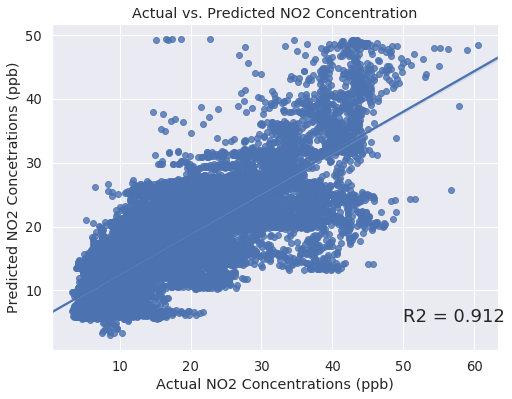

In [256]:
# Creating a plot of NO2 concentration vs predicted concentration using OLS
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)
plt.figure(figsize = (8,6))
ax = sns.regplot(x = NO2.NO2_Value, y = NO2_OLS_Lasso_results.fittedvalues, fit_reg=True)
ax.set(xlabel = 'Actual NO2 Concentrations (ppb)', ylabel = 'Predicted NO2 Concetrations (ppb)')
plt.title('Actual vs. Predicted NO2 Concentration')
plt.text(50 , 5 ,"R2 = 0.912", fontsize = 18)


<div class="alert alert-block alert-success"> <b> This model does much better than the model that was developed just based on features that were not highly correlated. Predicted values for high concentration measurements are still pretty poor. The features selected by the Lasso model also have very high VIF scores.</b></div>

In [257]:
#Create a dataframe with NO2 value and selected columns from Lasso
Lasso_NO2_df = NO2[['NO2_Value']].join(NO2_features[coef_NO2[coef_NO2 !=0].index])

In [258]:
Lasso_NO2_corr = Lasso_NO2_df.corr()
arr_corr_NO2= Lasso_NO2_corr.as_matrix()

module://ipykernel.pylab.backend_inline


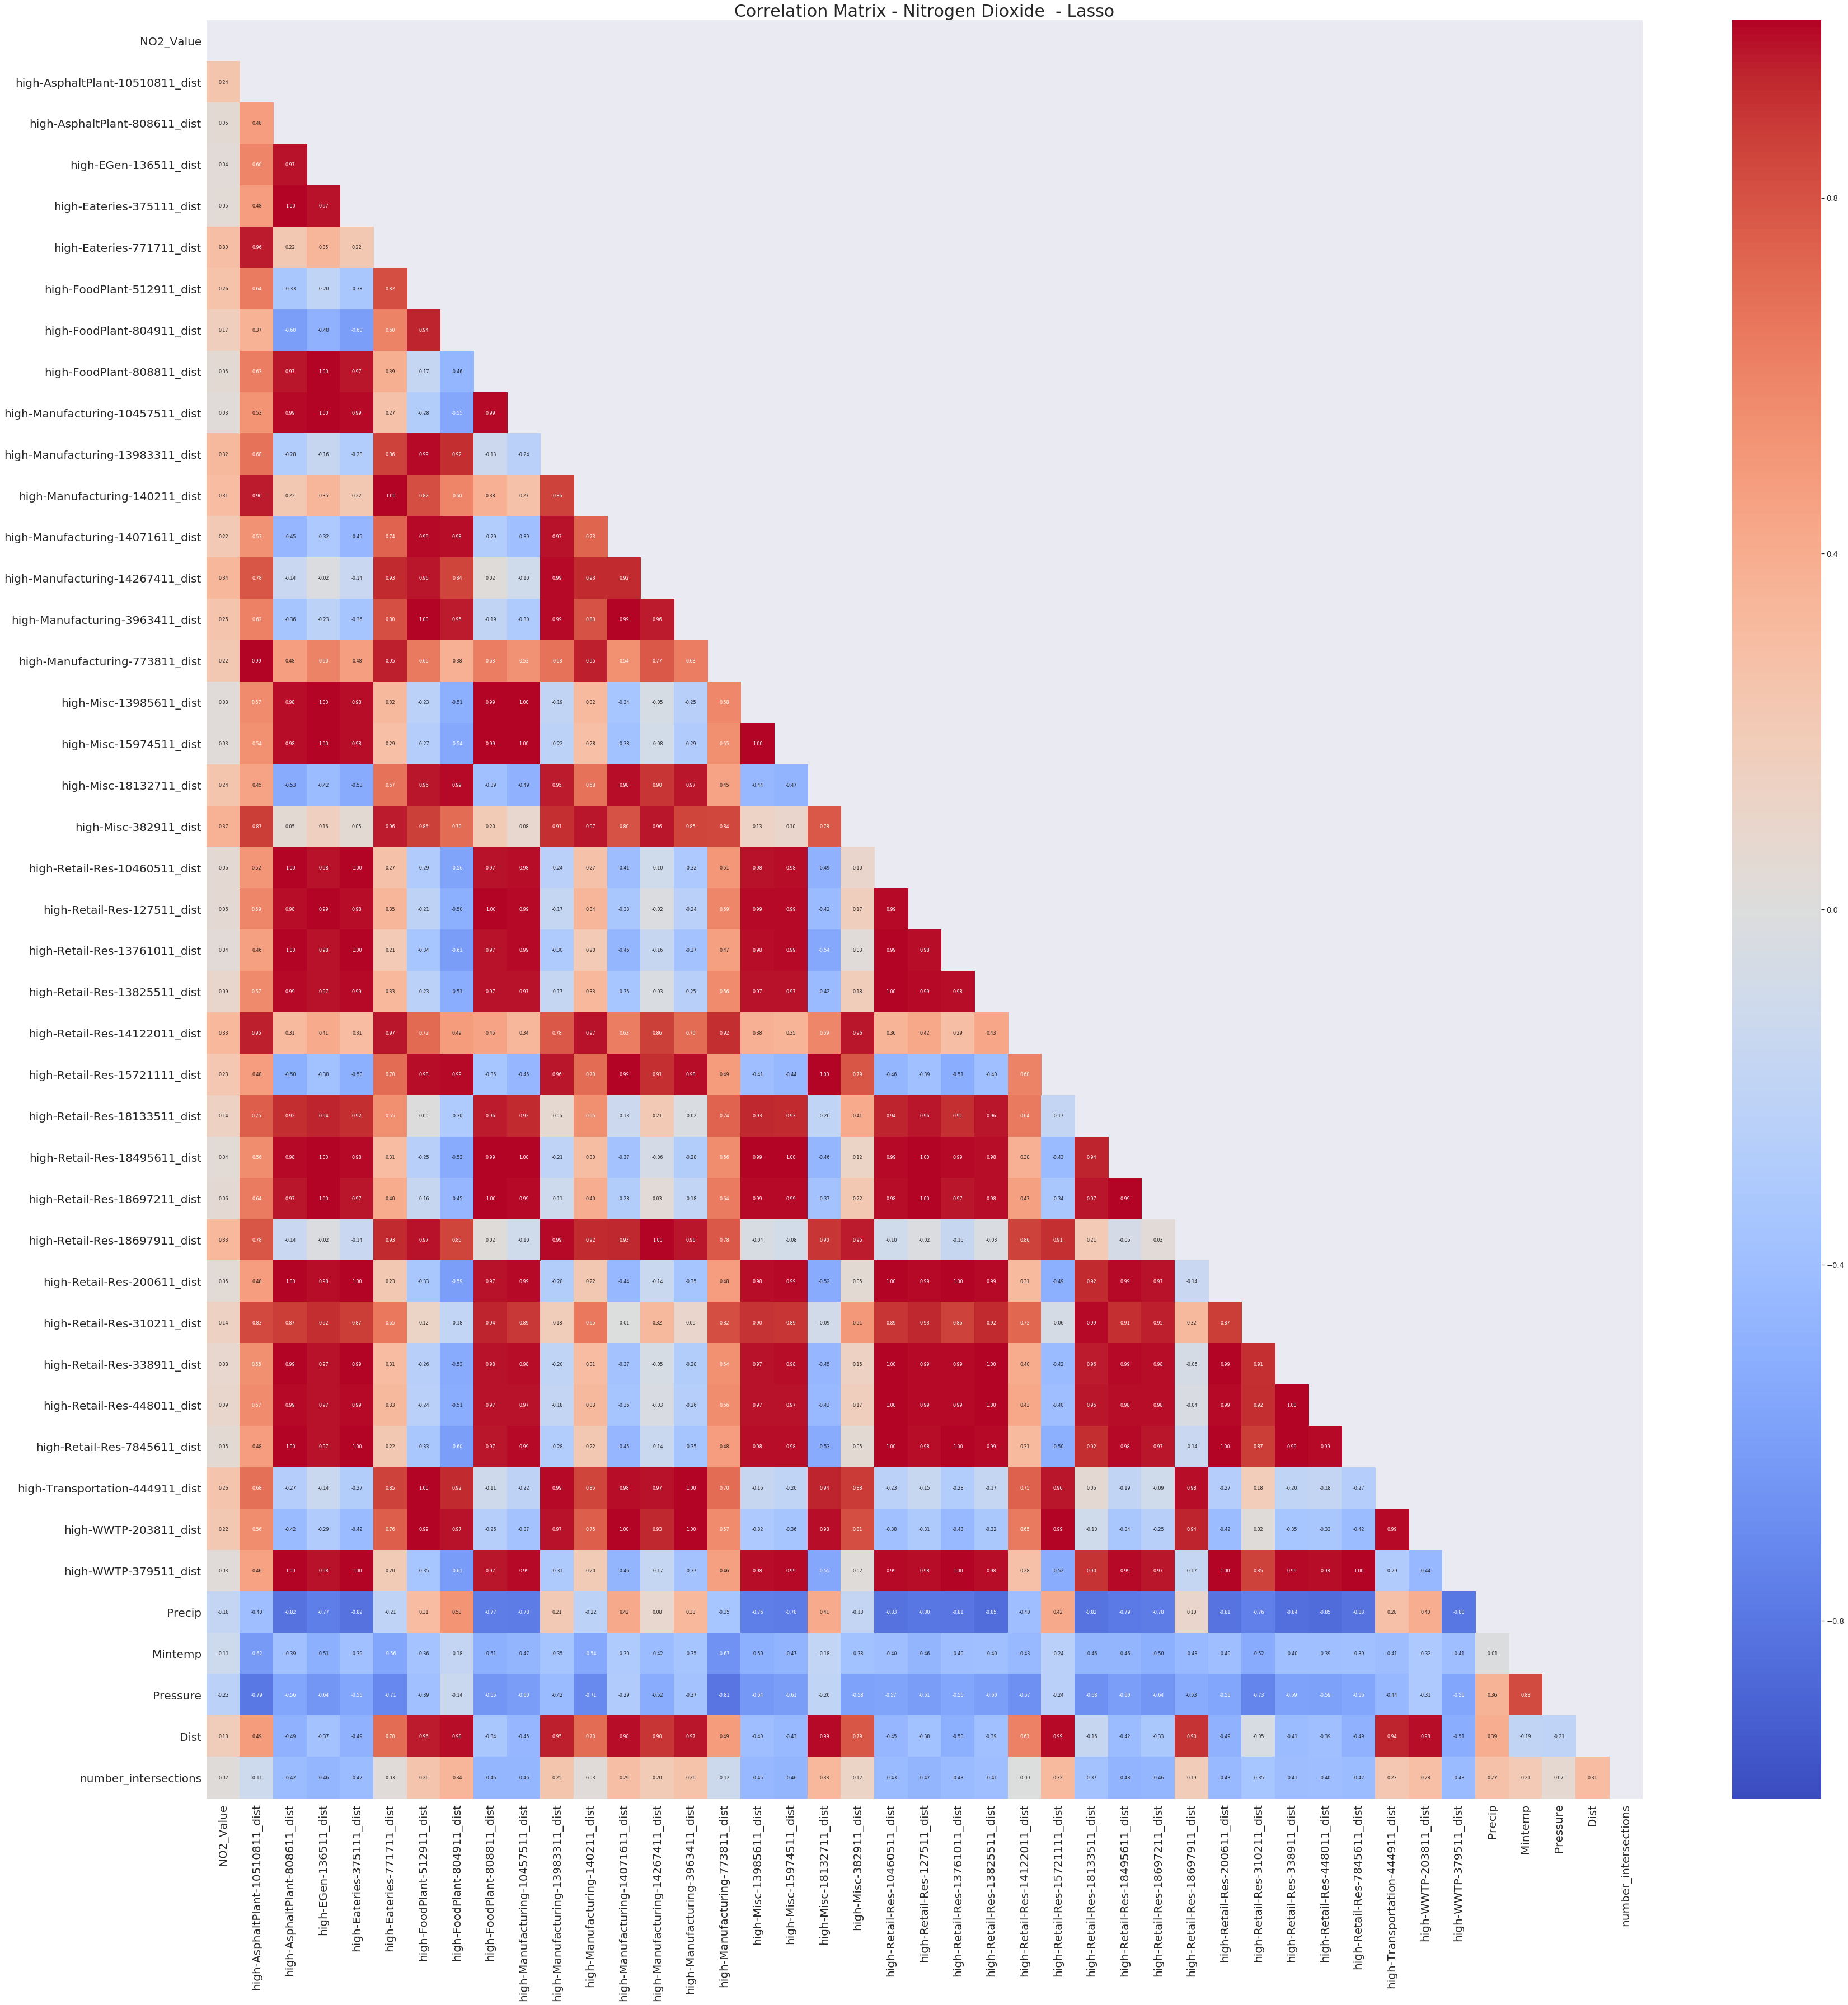

In [259]:
print(plt.get_backend())

# close any existing plots
plt.close("all")

# mask out the top triangle
arr_corr_NO2[np.triu_indices_from(arr_corr_NO2)] = np.nan

fig, ax = plt.subplots(figsize=(50, 50))

hm = sns.heatmap(arr_corr_NO2, cbar=True, vmin = -1, vmax = 1, center = 0,
                 fmt='.2f', annot_kws={'size': 8}, annot=True, 
                 square=False, cmap = 'coolwarm')
#cmap=plt.cm.Blues

ticks = np.arange(Lasso_NO2_corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(Lasso_NO2_corr.columns, rotation=90, fontsize=20)
ax.set_yticks(ticks)
ax.set_yticklabels(Lasso_NO2_corr.index, rotation=360, fontsize=20)

ax.set_title('Correlation Matrix - Nitrogen Dioxide  - Lasso', fontsize  = 30)
plt.tight_layout()
#plt.savefig("corr_matrix_incl_anno_double.png", dpi=300)

<b> <font size = 5> <span style="color:darkorange"> Step Forward Approach with VIF Scores calculations </b> </font> </span>

The approach here is to keep adding features sequentially, each time calculate the R2 value and see that's better than the previous R2. If the R2 is higher, then we calculate the VIF score with addition of each feature. If the VIF score of any of the features increases above threshold of 10, then we drop the newly added feature. 

<b> <font size = 3> <span style="color:darkorange"> BC Dataset </b> </font> </span>

<b> <font size = 3> <span style="color:blue"> First, create a dataframe with y and standardized x values. Then create a dataframe in VIF format i.e. each column header should be Q('column name'), except the target variable.   </b> </font> </span>

In [260]:
y_BC_vif_df = BC[['BC_Value']]
X_BC_vif_df = BC.drop(columns = ['BC_Value'])
X_BC_scaled_vif_df = pd.DataFrame(StandardScaler().fit_transform(X_BC_vif_df), index = X_BC_vif_df.index, columns = X_BC_vif_df.columns)

<b> <font size = 3> <span style="color:blue">  Dataframe for VIF and Regressions </b> </font> </span>

In [263]:
# Split dataframe into test and train data for R2/vif estimation
X_train_BC_vif, X_test_BC_vif, y_train_BC_vif, y_test_BC_vif = train_test_split(X_BC_vif_df , y_BC_vif_df, test_size  = 0.30, random_state=0)

**Training Data**



In [264]:
X_BC_vif_train, BC_vif_df_train = create_inputs_R2_vif_func_BC(X_train_BC_vif, y_train_BC_vif)

In [266]:
calculate_R2_vif(X_BC_vif_train, 'BC_Value', BC_vif_df_train)

["Q('Radiation')"]


(     VIF Factor        features
 0  46676.348204       Intercept
 1      1.000000  Q('Radiation'), <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:               BC_Value   R-squared (uncentered):                   0.593
 Model:                            OLS   Adj. R-squared (uncentered):              0.593
 Method:                 Least Squares   F-statistic:                          2.190e+04
 Date:                Sun, 14 Jun 2020   Prob (F-statistic):                        0.00
 Time:                        23:17:33   Log-Likelihood:                         -13655.
 No. Observations:               15041   AIC:                                  2.731e+04
 Df Residuals:                   15040   BIC:                                  2.732e+04
 Df Model:                           1                                                  
 Covariance Type:            nonrobust            

**Test Data**


In [267]:
X_BC_vif_test, BC_vif_df_test = create_inputs_R2_vif_func_BC(X_test_BC_vif, y_test_BC_vif)

In [268]:
calculate_R2_vif(X_BC_vif_test, 'BC_Value', BC_vif_df_test)

["Q('Radiation')"]


(     VIF Factor        features
 0  46894.386704       Intercept
 1      1.000000  Q('Radiation'), <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:               BC_Value   R-squared (uncentered):                   0.584
 Model:                            OLS   Adj. R-squared (uncentered):              0.584
 Method:                 Least Squares   F-statistic:                              9059.
 Date:                Sun, 14 Jun 2020   Prob (F-statistic):                        0.00
 Time:                        23:18:10   Log-Likelihood:                         -6045.7
 No. Observations:                6447   AIC:                                  1.209e+04
 Df Residuals:                    6446   BIC:                                  1.210e+04
 Df Model:                           1                                                  
 Covariance Type:            nonrobust            

<div class="alert alert-block alert-success"> <b> Based on the step forward VIF approach with R2, 'Radiation' was the only feature that was selected. This indicates Radiation is highly correlated with BC concentration.</b></div>

print(plt.get_backend())

#close any existing plots
plt.close("all")

#mask out the top triangle
VIF_BC_corr_arr[np.triu_indices_from(VIF_BC_corr_arr)] = np.nan

fig, ax = plt.subplots(figsize=(10, 10))

hm = sns.heatmap(VIF_BC_corr_arr, cbar=True, vmin = -1, vmax = 1, center = 0,
                 fmt='.2f', annot_kws={'size': 8}, annot=True, 
                 square=False, cmap = 'coolwarm')
#cmap=plt.cm.Blues

ticks = np.arange(VIF_BC_corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(VIF_BC_corr.columns, rotation=90, fontsize=15)
ax.set_yticks(ticks)
ax.set_yticklabels(VIF_BC_corr.index, rotation=360, fontsize=15)

ax.set_title('Correlation Matrix - Black Carbon  - VIF', fontsize  = 20)
plt.tight_layout()
#plt.savefig("corr_matrix_incl_anno_double.png", dpi=300)

<b> <font size = 3> <span style="color:darkorange"> NO2 Dataset </b> </font> </span>

<b> <font size = 3> <span style="color:blue"> First, create a dataframe with y and standardized x values. Then create a dataframe in VIF format i.e. each column header should be Q('column name'), except the target variable.   </b> </font> </span>

In [269]:
y_NO2_vif_df = NO2[['NO2_Value']]
X_NO2_vif_df = NO2.drop(columns = ['NO2_Value'])
X_NO2_scaled_vif_df = pd.DataFrame(StandardScaler().fit_transform(X_NO2_vif_df), index = X_NO2_vif_df.index, columns = X_NO2_vif_df.columns)

<b> <font size = 3> <span style="color:blue">  Dataframe for VIF and Regressions </b> </font> </span>

In [270]:
# Split dataframe into test and train data for R2/vif estimation
X_train_NO2_vif, X_test_NO2_vif, y_train_NO2_vif, y_test_NO2_vif = train_test_split(X_NO2_vif_df , y_NO2_vif_df, test_size  = 0.30, random_state=0)

**Training Data**

In [271]:
X_NO2_vif_train, NO2_vif_df_train = create_inputs_R2_vif_func_NO2(X_train_NO2_vif, y_train_NO2_vif)

In [272]:
calculate_R2_vif(X_NO2_vif_train, 'NO2_Value', NO2_vif_df_train)

["Q('Radiation')"]


(     VIF Factor        features
 0  46676.348204       Intercept
 1      1.000000  Q('Radiation'), <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:              NO2_Value   R-squared (uncentered):                   0.759
 Model:                            OLS   Adj. R-squared (uncentered):              0.759
 Method:                 Least Squares   F-statistic:                          4.748e+04
 Date:                Sun, 14 Jun 2020   Prob (F-statistic):                        0.00
 Time:                        23:25:17   Log-Likelihood:                         -55437.
 No. Observations:               15041   AIC:                                  1.109e+05
 Df Residuals:                   15040   BIC:                                  1.109e+05
 Df Model:                           1                                                  
 Covariance Type:            nonrobust            

**Test Data**

In [274]:
X_NO2_vif_test, NO2_vif_df_test = create_inputs_R2_vif_func_NO2(X_test_NO2_vif, y_test_NO2_vif)

In [275]:
calculate_R2_vif(X_NO2_vif_test, 'NO2_Value', NO2_vif_df_test)

["Q('Radiation')"]


(     VIF Factor        features
 0  46894.386704       Intercept
 1      1.000000  Q('Radiation'), <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:              NO2_Value   R-squared (uncentered):                   0.757
 Model:                            OLS   Adj. R-squared (uncentered):              0.757
 Method:                 Least Squares   F-statistic:                          2.004e+04
 Date:                Sun, 14 Jun 2020   Prob (F-statistic):                        0.00
 Time:                        23:26:25   Log-Likelihood:                         -23872.
 No. Observations:                6447   AIC:                                  4.775e+04
 Df Residuals:                    6446   BIC:                                  4.775e+04
 Df Model:                           1                                                  
 Covariance Type:            nonrobust            

<div class="alert alert-block alert-success"> <b> Similar to BC dataset, based on the step forward VIF approach with R2, 'Radiation' was the only feature that was selected. This indicates Radiation is highly correlated with NO2 concentration.</b></div>

<b> <font size = 5> <span style="color:darkorange">  Principal Component Analysis + Decision Tree Regressor for Feature Selection</b> </font> </span>

<b> <font size = 4> <span style="color:darkorange"> BC Dataset</b> </font> </span>

In [278]:
y_BC_original = BC[['BC_Value']]
X_BC_original = BC.drop(columns = 'BC_Value')

In [279]:
# Create the test train split again from the original data, without scaling
X_train_BC_PCA, X_test_BC_PCA, y_train_BC_PCA, y_test_BC_PCA = train_test_split(X_BC_original, y_BC_original, test_size=0.30, random_state=0)

Here, the idea is to setup a pipeline to first standardize the data using standard scaler, then fit a PCA model and then use a decision tree regressor on the training dataset. Next, do a gridsearch over different tree depths, fit the training data to the model and use cross-validation to evaluate the model. Finally, we make predictions based on the fitted model on the test set and the entire dataset and calculate a cross-validation score. 

In [ ]:
time1 = time.time()
#Create a Scaler object
sc = StandardScaler()

#Instantiate PCA
pca = PCA()

#Create decision tree regressor object
dtreeReg = DecisionTreeRegressor()

# Create a pipeline of three steps. First, standardize the data.
# Second, transform the training data with PCA.
# Third, train a Decision Tree Regressor on the training data.
pipe = Pipeline(steps=[('sc', sc),
                       ('pca', pca),
                       ('dtreeReg', dtreeReg)])


# Create Parameter Space
# Create a list of a sequence of integers from 1 to 68 (the number of features in X + 1)
n_components = list(range(1,X_train_BC_PCA.shape[1]+1,1))


# Create lists of parameter for DecisionTreeRegressor. Here we use mse as the criterion
criterion = ['mse']
max_depth = [4,6,8,10]


# Create a dictionary of all the parameter options 

parameters = dict(pca__n_components=n_components,
                dtreeReg__criterion=criterion,
                dtreeReg__max_depth=max_depth)


# Conduct Parameter Optmization With Pipeline
# Create a grid search object
clf = GridSearchCV(pipe, parameters)


# Fit the grid search on training data
clf.fit(X_train_BC_PCA, y_train_BC_PCA)

# View The Best Parameters
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])
print(); print(clf.best_estimator_.get_params()['dtreeReg'])


# Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(clf, X_test_BC_PCA, y_test_BC_PCA, cv=5, n_jobs=-1, scoring='r2')
print("CV Result for each set: ", CV_Result)
print("Mean CV result for PCA and Decision Tree Model: ", CV_Result.mean())


## Make predictions based on fitted model
y_pred_BC_PCA_test = clf.predict(X_test_BC_PCA)
y_pred_BC_PCA = clf.predict(X_BC_original)


### Print the components and explained variance
#clf.best_estimator_.named_steps['pca'].components_
print(clf.best_estimator_.named_steps['pca'].explained_variance_ratio_)
time2 = time.time()

print(time2 - time1)

In [ ]:
#Calculate the R2 on the predicted y and original y value
print("R2 on the predicted y and original BC value is:", r2_score(y_BC_original, y_pred_BC_PCA))
print("R2 on the predictted y on the test dataset and BC value of test dataset is:", r2_score(y_test_BC_PCA, y_pred_BC_PCA_test))

In [ ]:
# Creating a plot of BC concentration vs predicted concentration using OLS
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)
plt.figure(figsize = (8,6))
ax = sns.regplot(x = y_BC_original, y = y_pred_BC_PCA, fit_reg=True)
ax.set(xlabel = 'Actual BC Concentrations (ug/m3)', ylabel = 'Predicted BC Concetrations (ug/m3)')
plt.title('Actual vs. Predicted BC Concentration')
plt.text(6 , 7 ,"R2 = 0.779", fontsize = 18)


In [ ]:
#Explained variance ratio
explained_var = np.cumsum(clf.best_estimator_.named_steps['pca'].explained_variance_ratio_)
print(explained_var)

The PCA + DecisionTree Regressor resulted in the selection of 31 components, and the mean cross validation score for the test dataset is 0.60. Predicting the 'y' value based on the model results in an R2 value of 0.78. 99% of the variance in the model is explained with these 31 selected components. 

<b> <font size = 4> <span style="color:darkorange"> NO2 Dataset</b> </font> </span>

In [280]:
y_NO2_original = NO2[['NO2_Value']]
X_NO2_original = NO2.drop(columns = 'NO2_Value')

In [281]:
# Create the test train split again from the original data, without scaling
X_train_NO2_PCA, X_test_NO2_PCA, y_train_NO2_PCA, y_test_NO2_PCA = train_test_split(X_NO2_original, y_NO2_original, test_size=0.30, random_state=0)

In [ ]:
#Create a Scaler object
sc = StandardScaler()

#Instantiate PCA
pca = PCA()

#Create decision tree regressor object
dtreeReg = DecisionTreeRegressor()

# Create a pipeline of three steps. First, standardize the data.
# Second, transform the training data with PCA.
# Third, train a Decision Tree Regressor on the training data.
pipe = Pipeline(steps=[('sc', sc),
                       ('pca', pca),
                       ('dtreeReg', dtreeReg)])


# Create Parameter Space
# Create a list of a sequence of integers from 1 to 68 (the number of features in X + 1)
n_components = list(range(1,X_train_NO2_PCA.shape[1]+1,1))


# Create lists of parameter for DecisionTreeRegressor. Here we use mse as the criterion
criterion = ['mse']
max_depth = [4,6,8,10]


# Create a dictionary of all the parameter options 

parameters = dict(pca__n_components=n_components,
                dtreeReg__criterion=criterion,
                dtreeReg__max_depth=max_depth)


# Conduct Parameter Optmization With Pipeline
# Create a grid search object
clf_NO2 = GridSearchCV(pipe, parameters)


# Fit the grid search on training data
clf_NO2.fit(X_train_NO2_PCA, y_train_NO2_PCA)

# View The Best Parameters
print('Best Number Of Components:', clf_NO2.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_NO2.best_estimator_.get_params()['dtreeReg'])


# Use Cross Validation To Evaluate Model
CV_Result_NO2 = cross_val_score(clf_NO2, X_test_NO2_PCA, y_test_NO2_PCA, cv=5, n_jobs=-1, scoring='r2')
print("CV Result for each set: ", CV_Result_NO2)
print("Mean CV result for PCA and Decision Tree Model: ", CV_Result_NO2.mean())


## Make predictions based on fitted model
y_pred_NO2_PCA_test = clf_NO2.predict(X_test_NO2_PCA)
y_pred_NO2_PCA = clf_NO2.predict(X_NO2_original)


### Print the components and explained variance
#clf.best_estimator_.named_steps['pca'].components_
print(clf_NO2.best_estimator_.named_steps['pca'].explained_variance_ratio_)

In [ ]:
#Calculate the R2 on the predicted y and original y value
print("R2 on the predicted y and original NO2 value is:", r2_score(y_NO2_original, y_pred_NO2_PCA))
print("R2 on the predictted y on the test dataset and NO2 value of test dataset is:", r2_score(y_test_NO2_PCA, y_pred_NO2_PCA_test))

In [ ]:
# Creating a plot of NO2 concentration vs predicted concentration using OLS
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)
plt.figure(figsize = (8,6))
ax = sns.regplot(x = y_NO2_original, y = y_pred_NO2_PCA, fit_reg=True)
ax.set(xlabel = 'Actual NO2 Concentrations (ppb)', ylabel = 'Predicted NO2 Concetrations (ppb)')
plt.title('Actual vs. Predicted NO2 Concentration')
plt.text(45 , 55 ,"R2 = 0.88", fontsize = 18)


The PCA + DecisionTree Regressor resulted in the selection of 50 components, and the mean cross validation score for the test dataset is 0.78. Predicting the 'y' value based on the model results in an R2 value of 0.88. 99% of the variance in the model is explained with these 50 selected components. 

<b> <font size = 5> <span style="color:darkorange">  Random Forest for Feature Selection</b> </font> </span>

<b> <font size = 4> <span style="color:darkorange"> BC Dataset</b> </font> </span>

In [6]:
y_BC_original = BC[['BC_Value']]
X_BC_original = BC.drop(columns = 'BC_Value')

In [7]:
## Test Train split 
X_BC_original_train, X_BC_original_test, y_BC_original_train, y_BC_original_test = train_test_split(X_BC_original, y_BC_original, test_size = 0.3, random_state = 0)  

**Feature selection using training data**

In [17]:
#Create random forest regressor object
RFRegressor = RandomForestRegressor(random_state = 0, n_estimators = 100, n_jobs = -1, max_features = 'auto')


# fit the model
RFRegressor.fit(X_BC_original_train, y_BC_original_train)

# get importance
importance = RFRegressor.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

    
#Create a dataframe
BC_train_feature_importance= pd.DataFrame({'feature': X_BC_original_train.columns, 'importance': importance})


Feature: 0, Score: 0.00218
Feature: 1, Score: 0.00201
Feature: 2, Score: 0.00208
Feature: 3, Score: 0.00382
Feature: 4, Score: 0.01457
Feature: 5, Score: 0.10610
Feature: 6, Score: 0.00705
Feature: 7, Score: 0.02149
Feature: 8, Score: 0.03839
Feature: 9, Score: 0.00615
Feature: 10, Score: 0.00212
Feature: 11, Score: 0.00251
Feature: 12, Score: 0.01911
Feature: 13, Score: 0.00819
Feature: 14, Score: 0.01829
Feature: 15, Score: 0.00461
Feature: 16, Score: 0.00587
Feature: 17, Score: 0.00556
Feature: 18, Score: 0.00925
Feature: 19, Score: 0.00448
Feature: 20, Score: 0.00492
Feature: 21, Score: 0.00201
Feature: 22, Score: 0.00225
Feature: 23, Score: 0.00350
Feature: 24, Score: 0.09191
Feature: 25, Score: 0.00271
Feature: 26, Score: 0.00586
Feature: 27, Score: 0.00297
Feature: 28, Score: 0.00923
Feature: 29, Score: 0.00482
Feature: 30, Score: 0.00415
Feature: 31, Score: 0.00832
Feature: 32, Score: 0.00455
Feature: 33, Score: 0.00548
Feature: 34, Score: 0.01475
Feature: 35, Score: 0.00849
Fe

In [18]:
## Assign groupings to dataframe
BC_train_feature_importance['grouping'] = " "
for index, str in enumerate(BC_train_feature_importance['feature']):
    group = re.findall(r'high-(.+?)-',str)
    if group:
        BC_train_feature_importance.loc[index, 'grouping'] = group
    else:
        BC_train_feature_importance.loc[index, 'grouping'] =  BC_train_feature_importance.loc[index, 'feature']



In [19]:
BC_train_feature_importance = BC_train_feature_importance.sort_values(['importance'], ascending = False)

In [20]:
BC_train_feature_importance.loc[:35]

feature  importance        grouping
5     high-ConcretePlant-193511_dist    0.106097   ConcretePlant
24  high-Manufacturing-10476711_dist    0.091909   Manufacturing
37     high-Retail-Res-10517111_dist    0.082444          Retail
53       high-Retail-Res-448011_dist    0.064609          Retail
63                           Maxtemp    0.058395         Maxtemp
41     high-Retail-Res-14122011_dist    0.051634          Retail
66                              Dist    0.047376            Dist
8              high-EGen-136511_dist    0.038388            EGen
52       high-Retail-Res-338911_dist    0.029155          Retail
50       high-Retail-Res-310211_dist    0.028773          Retail
39       high-Retail-Res-137211_dist    0.023615          Retail
7            high-EGen-10707511_dist    0.021493            EGen
12      high-FoodPlant-14318611_dist    0.019115       FoodPlant
14      high-FoodPlant-15756011_dist    0.018289       FoodPlant
34             high-Misc-382911_dist    0.014747            Misc
4   high-ConcretePlant-10518911_dist    0.014569   ConcretePlant
46     high-Retail-Res-15941111_dist    0.013380          Retail
51       high-Retail-Res-310411_dist    0.012522          Retail
54       high-Retail-Res-450311_dist    0.010914          Retail
56   high-Transportation-444911_dist    0.010485  Transportation
45     high-Retail-Res-15745711_dist    0.009507          Retail
18        high-FoodPlant-808811_dist    0.009254       FoodPlant
28  high-Manufacturing-14267411_dist    0.009225   Manufacturing
35     high-Retail-Res-10460511_dist    0.008486          Retail

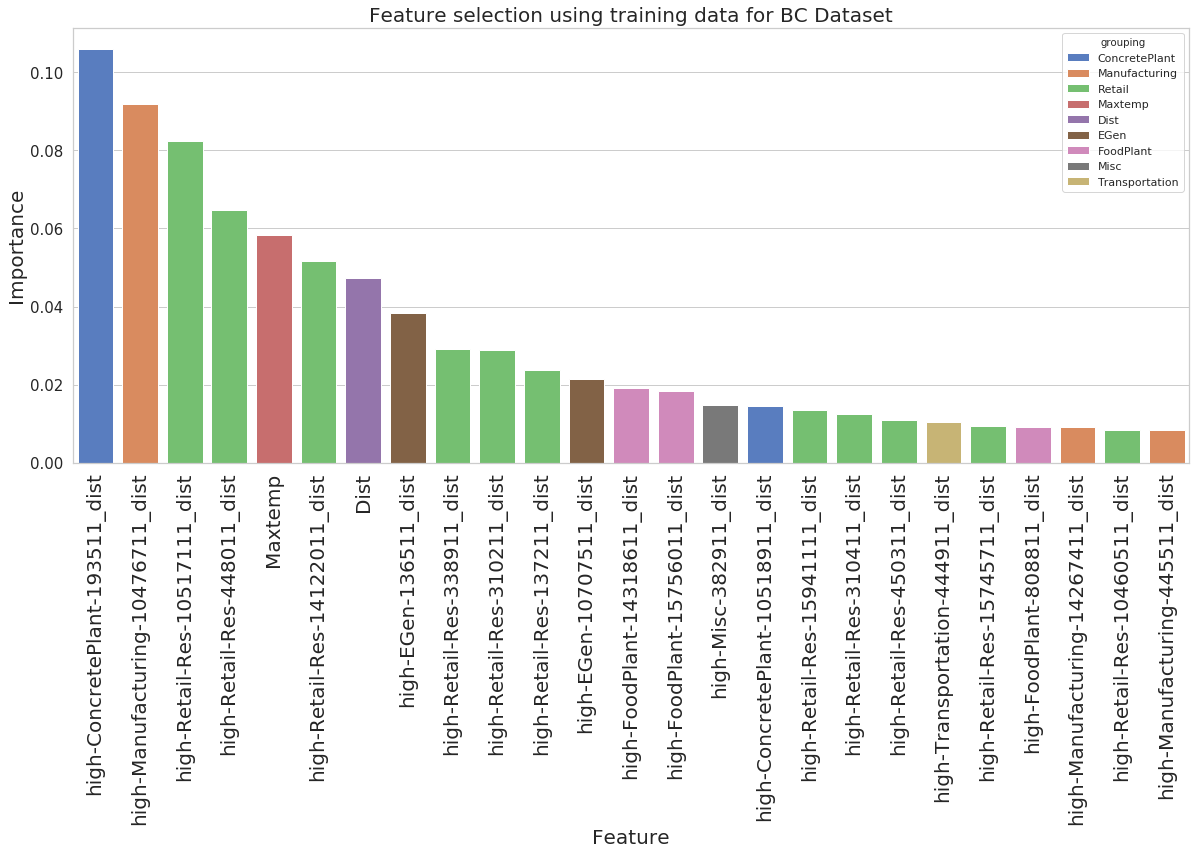

In [37]:
#plot feature importance
plt.figure(figsize = (20,8))
ax = sns.barplot(y = 'importance', x = 'feature', hue = 'grouping',  data = BC_train_feature_importance[:25], 
             dodge = False, palette = 'muted')
plt.xticks(rotation = 90)
plt.xlabel("Feature", size = 20)
plt.xticks(size = 20, rotation = 90)
plt.yticks(size = 15)
plt.ylabel("Importance", size = 20)
plt.title("Feature selection using training data for BC Dataset", size = 20)
plt.show()
#order=BC_train_feature_importance.sort_values('importance',ascending = False).feature

**Feature selection using test data**

In [49]:
#Create random forest regressor object
RFRegressor = RandomForestRegressor(random_state = 0, n_estimators = 100, n_jobs = -1, max_features = 'auto')


# fit the model
RFRegressor.fit(X_BC_original_test, y_BC_original_test)

# get importance
importance = RFRegressor.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

    
#Create a dataframe
BC_test_feature_importance= pd.DataFrame({'feature': X_BC_original_test.columns, 'importance': importance})


Feature: 0, Score: 0.00244
Feature: 1, Score: 0.01592
Feature: 2, Score: 0.00220
Feature: 3, Score: 0.00408
Feature: 4, Score: 0.00811
Feature: 5, Score: 0.08189
Feature: 6, Score: 0.00958
Feature: 7, Score: 0.01324
Feature: 8, Score: 0.03508
Feature: 9, Score: 0.00634
Feature: 10, Score: 0.02835
Feature: 11, Score: 0.00319
Feature: 12, Score: 0.01454
Feature: 13, Score: 0.00789
Feature: 14, Score: 0.01725
Feature: 15, Score: 0.00449
Feature: 16, Score: 0.00586
Feature: 17, Score: 0.00484
Feature: 18, Score: 0.00392
Feature: 19, Score: 0.00411
Feature: 20, Score: 0.00748
Feature: 21, Score: 0.01234
Feature: 22, Score: 0.02416
Feature: 23, Score: 0.02451
Feature: 24, Score: 0.13313
Feature: 25, Score: 0.00307
Feature: 26, Score: 0.00701
Feature: 27, Score: 0.00362
Feature: 28, Score: 0.00672
Feature: 29, Score: 0.00680
Feature: 30, Score: 0.00384
Feature: 31, Score: 0.01523
Feature: 32, Score: 0.00486
Feature: 33, Score: 0.00327
Feature: 34, Score: 0.00727
Feature: 35, Score: 0.02017
Fe

In [50]:
## Assign groupings to dataframe
BC_test_feature_importance['grouping'] = ""
for index, s in enumerate(BC_test_feature_importance['feature']):
    group = re.findall(r'high-(.+?)-',s)
    if group:
        BC_test_feature_importance.loc[index, 'grouping'] = group
    else:
        BC_test_feature_importance.loc[index, 'grouping'] =  BC_test_feature_importance.loc[index, 'feature']

# ### Assign colors to different groups
# BC_test_feature_importance['color'] = ""
# for index, s in enumerate(BC_test_feature_importance['grouping']):
#     if s == 'Manufacturing': 
#         BC_test_feature_importance['color'] = 'Red'
#     elif s == 'ConcretePlant':
#         BC_test_feature_importance['color'] = 'LightGreen'
#     elif s == 'Maxtemp':
#         BC_test_feature_importance['color'] = 'LightBlue'
#     elif s == 'Dist':
#         BC_test_feature_importance['color'] = 'LightPink'
#     elif s =='Retail':
#         BC_test_feature_importance['color'] = 'Grey'
#     elif s == 'EGen':
#         BC_test_feature_importance['color'] = 'Orange'
#     elif s == 'Eateries':
#         BC_test_feature_importance['color'] = 'Brown'
        

In [51]:
BC_test_feature_importance = BC_test_feature_importance.sort_values(['importance'], ascending = False)

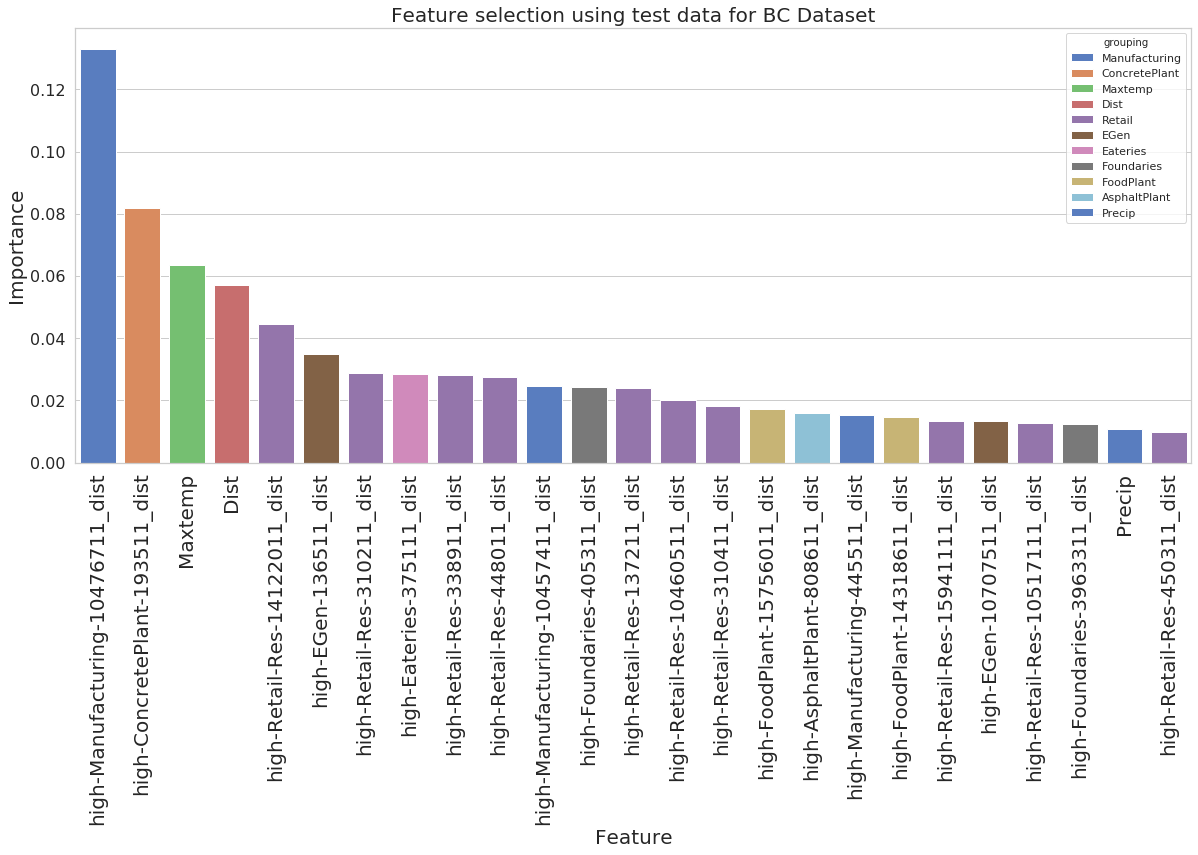

In [52]:
#plot feature importance
plt.figure(figsize = (20,8))
ax = sns.barplot(y = 'importance', x = 'feature', hue = 'grouping',  data = BC_test_feature_importance[:25], 
             dodge = False, palette = 'muted')
plt.xticks(rotation = 90)
plt.xlabel("Feature", size = 20)
plt.xticks(size = 20)
plt.yticks(size = 16)
plt.ylabel("Importance", size = 20)
plt.title("Feature selection using test data for BC Dataset", size = 20)
plt.show()
#order=BC_test_feature_importance.sort_values('importance',ascending = False).feature

#Create a Scaler object
sc = StandardScaler()

#Instantiate PCA
pca = PCA()

#Create random forest regressor object
RFRegressor = RandomForestRegressor(random_state = 0, n_estimators = 50, n_jobs = -1, max_features = 'auto')

#Create a pipeline of three steps. First, standardize the data.
#Second, transform the training data with PCA.
#Third, train a Random Forest Regressor on the training data.
pipe = Pipeline(steps=[('sc', sc),
                       ('pca', pca),
                       ('RFRegressor', RFRegressor)])


#Create Parameter Space
#Create a list of a sequence of integers from 1 to 68 (the number of features in X + 1)
n_components = list(range(1,X_train_BC_PCA.shape[1]+1,1))


#Create lists of parameter for Random Forest Regressor. Here we use mse as the criterion
#Number of trees in random forest
n_estimators = [50, 100, 200, 400]
#Maximum number of levels in tree
max_depth = [10,15, 20, 25]
#Method of selecting samples for training each tree
bootstrap = [True, False]

#Create a dictionary of all the parameter options 

parameters = dict(pca__n_components=n_components,
                RFRegressor__max_depth=max_depth,
                RFRegressor__n_estimators=n_estimators)


#Conduct Parameter Optmization With Pipeline
#Create a grid search object
clf = GridSearchCV(pipe, parameters)


#Fit the grid search on training data
clf.fit(X_train_BC_PCA, y_train_BC_PCA)

#View The Best Parameters
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])
print(); print(clf.best_estimator_.get_params()['RFRegressor'])


#Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(clf, X_test_BC_PCA, y_test_BC_PCA, cv=5, n_jobs=-1, scoring='r2')
print("CV Result for each set: ", CV_Result)
print("Mean CV result for PCA and Random Forest Model: ", CV_Result.mean())


##Make predictions based on fitted model
y_pred_BC_PCA_test = clf.predict(X_test_BC_PCA)
y_pred_BC_PCA = clf.predict(X_BC_original)


###Print the components and explained variance
#clf.best_estimator_.named_steps['pca'].components_
print(clf.best_estimator_.named_steps['pca'].explained_variance_ratio_)

<b> <font size = 4> <span style="color:darkorange"> NO2 Dataset</b> </font> </span>

In [53]:
y_NO2_original = NO2[['NO2_Value']]
X_NO2_original = NO2.drop(columns = 'NO2_Value')

In [54]:
## Test Train split 
X_NO2_original_train, X_NO2_original_test, y_NO2_original_train, y_NO2_original_test = train_test_split(X_NO2_original, y_NO2_original, test_size = 0.3, random_state = 0)  

**Feature selection using training data**

In [55]:
#Create random forest regressor object
RFRegressor = RandomForestRegressor(random_state = 0, n_estimators = 100, n_jobs = -1, max_features = 'auto')


# fit the model
RFRegressor.fit(X_NO2_original_train, y_NO2_original_train)

# get importance
importance = RFRegressor.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

    
#Create a dataframe
NO2_train_feature_importance= pd.DataFrame({'feature': X_NO2_original_train.columns, 'importance': importance})


Feature: 0, Score: 0.00184
Feature: 1, Score: 0.00233
Feature: 2, Score: 0.00304
Feature: 3, Score: 0.14280
Feature: 4, Score: 0.01844
Feature: 5, Score: 0.00247
Feature: 6, Score: 0.01125
Feature: 7, Score: 0.08324
Feature: 8, Score: 0.00228
Feature: 9, Score: 0.00338
Feature: 10, Score: 0.02930
Feature: 11, Score: 0.00527
Feature: 12, Score: 0.00385
Feature: 13, Score: 0.00273
Feature: 14, Score: 0.00541
Feature: 15, Score: 0.01794
Feature: 16, Score: 0.00226
Feature: 17, Score: 0.00274
Feature: 18, Score: 0.00223
Feature: 19, Score: 0.23669
Feature: 20, Score: 0.00323
Feature: 21, Score: 0.00200
Feature: 22, Score: 0.00345
Feature: 23, Score: 0.05868
Feature: 24, Score: 0.00811
Feature: 25, Score: 0.00543
Feature: 26, Score: 0.00390
Feature: 27, Score: 0.01073
Feature: 28, Score: 0.01644
Feature: 29, Score: 0.00278
Feature: 30, Score: 0.01003
Feature: 31, Score: 0.00757
Feature: 32, Score: 0.00806
Feature: 33, Score: 0.00508
Feature: 34, Score: 0.00211
Feature: 35, Score: 0.00448
Fe

In [57]:
## Assign groupings to dataframe
NO2_train_feature_importance['grouping'] = ""
for index, str in enumerate(NO2_train_feature_importance['feature']):
    group = re.findall(r'high-(.+?)-',str)
    if group:
        NO2_train_feature_importance.loc[index, 'grouping'] = group
    else:
        NO2_train_feature_importance.loc[index, 'grouping'] = NO2_train_feature_importance.loc[index, 'feature']
        



In [58]:
NO2_train_feature_importance = NO2_train_feature_importance.sort_values(['importance'], ascending = False)

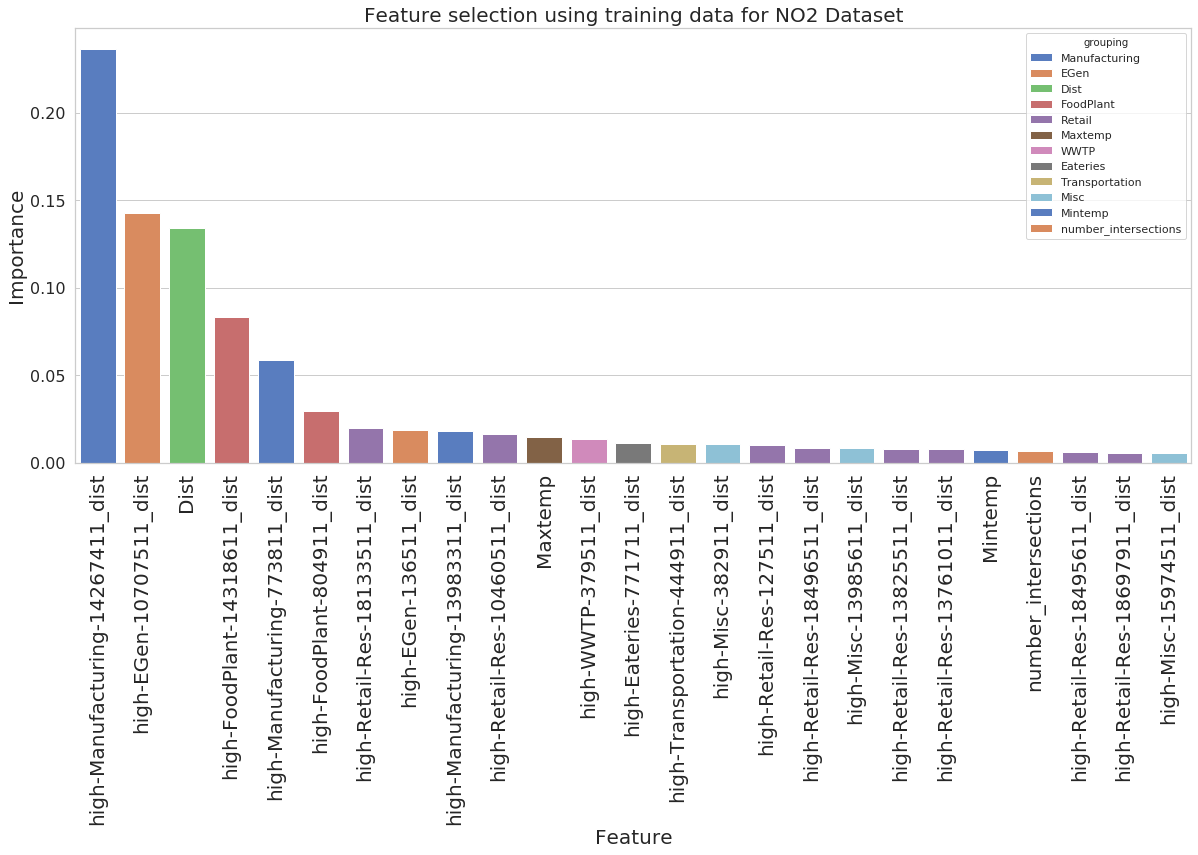

In [60]:
#plot feature importance
plt.figure(figsize = (20,8))
ax = sns.barplot(y = 'importance', x = 'feature', hue = 'grouping',  data = NO2_train_feature_importance[:25], 
             dodge = False, palette = 'muted')
plt.xticks(rotation = 90)
plt.xlabel("Feature", size = 20)
plt.xticks(size = 20)
plt.yticks(size = 16)
plt.ylabel("Importance", size = 20)
plt.title("Feature selection using training data for NO2 Dataset", size = 20)
plt.show()
#order=NO2_train_feature_importance.sort_values('importance',ascending = False).feature

**Feature selection using test data**

In [61]:
#Create random forest regressor object
RFRegressor = RandomForestRegressor(random_state = 0, n_estimators = 100, n_jobs = -1, max_features = 'auto')


# fit the model
RFRegressor.fit(X_NO2_original_test, y_NO2_original_test)

# get importance
importance = RFRegressor.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

    
#Create a dataframe
NO2_test_feature_importance= pd.DataFrame({'feature': X_NO2_original_test.columns, 'importance': importance})


Feature: 0, Score: 0.00223
Feature: 1, Score: 0.00313
Feature: 2, Score: 0.00476
Feature: 3, Score: 0.07215
Feature: 4, Score: 0.02243
Feature: 5, Score: 0.00334
Feature: 6, Score: 0.00621
Feature: 7, Score: 0.07913
Feature: 8, Score: 0.00274
Feature: 9, Score: 0.00450
Feature: 10, Score: 0.03251
Feature: 11, Score: 0.00568
Feature: 12, Score: 0.00683
Feature: 13, Score: 0.00277
Feature: 14, Score: 0.00739
Feature: 15, Score: 0.02089
Feature: 16, Score: 0.00357
Feature: 17, Score: 0.00373
Feature: 18, Score: 0.00284
Feature: 19, Score: 0.24240
Feature: 20, Score: 0.00308
Feature: 21, Score: 0.00269
Feature: 22, Score: 0.00499
Feature: 23, Score: 0.05094
Feature: 24, Score: 0.00606
Feature: 25, Score: 0.00664
Feature: 26, Score: 0.00414
Feature: 27, Score: 0.00882
Feature: 28, Score: 0.04291
Feature: 29, Score: 0.00253
Feature: 30, Score: 0.00738
Feature: 31, Score: 0.00621
Feature: 32, Score: 0.00695
Feature: 33, Score: 0.00463
Feature: 34, Score: 0.00406
Feature: 35, Score: 0.00306
Fe

In [62]:
## Assign groupings to dataframe
NO2_test_feature_importance['grouping'] = ""
for index, str in enumerate(NO2_test_feature_importance['feature']):
    group = re.findall(r'high-(.+?)-',str)
    if group:
        NO2_test_feature_importance.loc[index, 'grouping'] = group
    else:
        NO2_test_feature_importance.loc[index, 'grouping'] = NO2_test_feature_importance.loc[index, 'feature']
        



In [63]:
NO2_test_feature_importance = NO2_test_feature_importance.sort_values(['importance'], ascending = False)

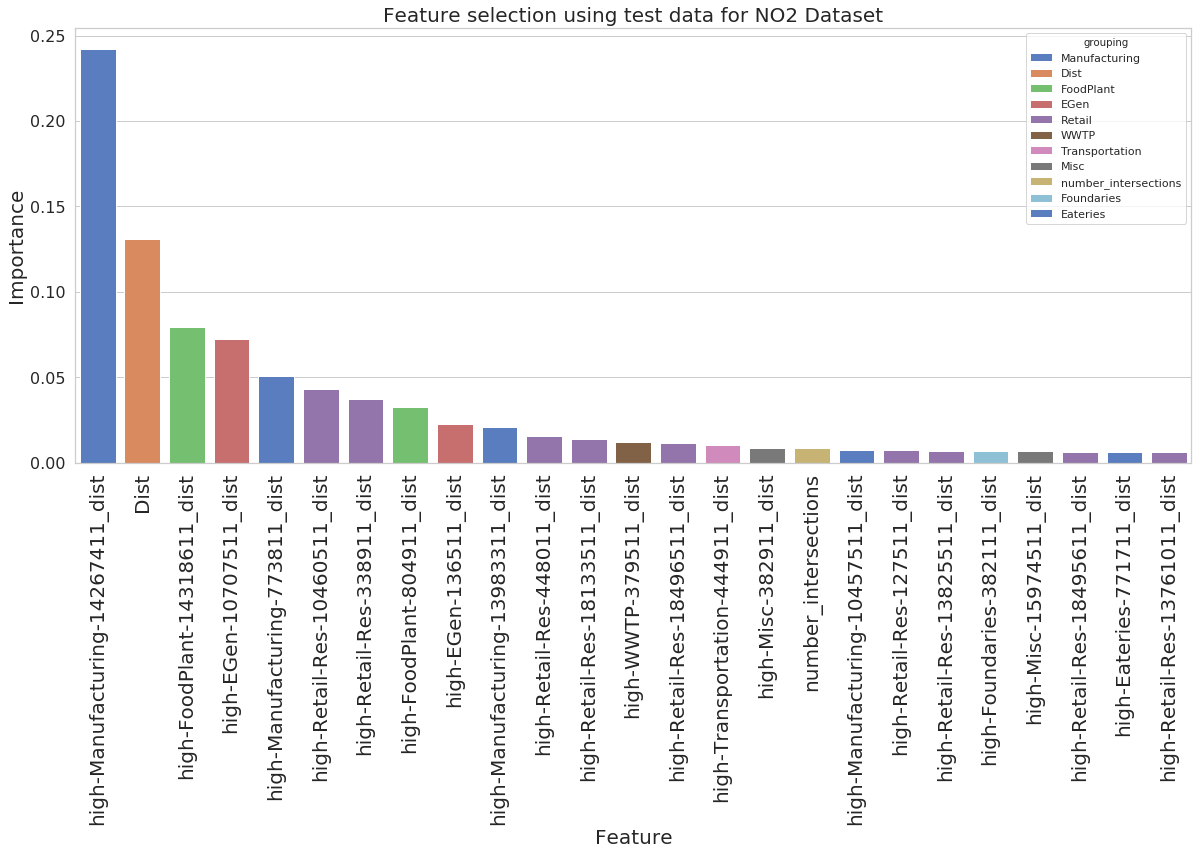

In [64]:
#plot feature importance
plt.figure(figsize = (20,8))
ax = sns.barplot(y = 'importance', x = 'feature', hue = 'grouping',  data = NO2_test_feature_importance[:25], 
             dodge = False, palette = 'muted')
plt.xticks(rotation = 90)
plt.xlabel("Feature", size = 20)
plt.xticks(size = 20)
plt.yticks(size = 16)
plt.ylabel("Importance", size = 20)
plt.title("Feature selection using test data for NO2 Dataset", size = 20)
plt.show()
#order=NO2_train_feature_importance.sort_values('importance',ascending = False).feature

#Create a Scaler object
sc = StandardScaler()

#Instantiate PCA
pca = PCA()

#Create random forest regressor object
RFRegressor = RandomForestRegressor(random_state = 0, n_estimators = 50, n_jobs = -1, max_features = 'auto')

#Create a pipeline of three steps. First, standardize the data.
#Second, transform the training data with PCA.
#Third, train a Random Forest Regressor on the training data.
pipe = Pipeline(steps=[('sc', sc),
                       ('pca', pca),
                       ('RFRegressor', RFRegressor)])


#Create Parameter Space
#Create a list of a sequence of integers from 1 to 68 (the number of features in X + 1)
n_components = list(range(1,X_train_BC_PCA.shape[1]+1,1))


#Create lists of parameter for Random Forest Regressor. Here we use mse as the criterion
#Number of trees in random forest
n_estimators = [50, 100, 200, 400]
#Maximum number of levels in tree
max_depth = [10,15, 20, 25]
#Method of selecting samples for training each tree
bootstrap = [True, False]

#Create a dictionary of all the parameter options 

parameters = dict(pca__n_components=n_components,
                RFRegressor__max_depth=max_depth,
                RFRegressor__n_estimators=n_estimators)


#Conduct Parameter Optmization With Pipeline
#Create a grid search object
clf = GridSearchCV(pipe, parameters)


#Fit the grid search on training data
clf.fit(X_train_NO2_PCA, y_train_NO2_PCA)

#View The Best Parameters
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])
print(); print(clf.best_estimator_.get_params()['RFRegressor'])


#Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(clf, X_test_NO2_PCA, y_test_NO2_PCA, cv=5, n_jobs=-1, scoring='r2')
print("CV Result for each set: ", CV_Result)
print("Mean CV result for PCA and Random Forest Model: ", CV_Result.mean())


##Make predictions based on fitted model
y_pred_NO2_PCA_test = clf.predict(X_test_NO2_PCA)
y_pred_NO2_PCA = clf.predict(X_NO2_original)


###Print the components and explained variance
#clf.best_estimator_.named_steps['pca'].components_
print(clf.best_estimator_.named_steps['pca'].explained_variance_ratio_)

<b> <font size = 5> <span style="color:darkorange"> Apply PCA And Test Performance of Several Models </b> </font> </span>

The idea here is to test model performances for different models with PCA and without PCA to see if there is any benefit of performing a PCA. 

<b> <font size = 5> <span style="color:green"> Function to apply PCA and test performance of several models </b> </font> </span>

In [ ]:
def diff_model_test(X,y):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, X,y, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
    results["RidgeCV"] = test_model(clf)

    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor(n_estimators = 200)
    results["RandomForest"]=test_model(clf)

    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    #results=results.sort(columns=["R Square Score"],ascending=False)
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    return results



<b> <font size = 4> <span style="color:darkorange"> BC Dataset </b> </font> </span>

In [ ]:
## USing PCA to test different models
#Create a Scaler object
scaler_BC = StandardScaler()

# Fit on training set only.
scaler_BC.fit(X_train_BC_PCA)

# Apply transform to both the training set and the test set.
X_train_BC_PCA = scaler_BC.transform(X_train_BC_PCA)
X_test_BC_PCA = scaler_BC.transform(X_test_BC_PCA)

In [ ]:
#Instantiate PCA
pca_BC = PCA(0.99) #Set the variance to be 0.99

pca_BC.fit(X_train_BC_PCA)


X_train_BC_PCA_trans = pca_BC.transform(X_train_BC_PCA)
X_test_BC_PCA_trans = pca_BC.transform(X_test_BC_PCA)

In [ ]:
## Call the function on BC dataset
print("Model score on training set: \n ")
diff_model_test(X_train_BC_PCA, y_train_BC_PCA)




In [ ]:
print("Model score on test set: \n")
diff_model_test(X_test_BC_PCA, y_test_BC_PCA)

 <b><b> <font size = 4> <span style="color:darkorange"> NO2 Dataset </b> </font> </span>

In [ ]:
## USing PCA to test different models
#Create a Scaler object
scaler_NO2 = StandardScaler()

# Fit on training set only.
scaler_NO2.fit(X_train_NO2_PCA)

# Apply transform to both the training set and the test set.
X_train_NO2_PCA = scaler_NO2.transform(X_train_NO2_PCA)
X_test_NO2_PCA = scaler_NO2.transform(X_test_NO2_PCA)

In [ ]:
#Instantiate PCA
pca = PCA(0.99)

pca.fit(X_train_NO2_PCA)


X_train_NO2_PCA_trans = pca.transform(X_train_NO2_PCA)
X_test_NO2_PCA_trans = pca.transform(X_test_NO2_PCA)

In [ ]:
## Call the function on NO2 dataset
print("Model score on training set: \n ")

diff_model_test(X_train_NO2_PCA, y_train_NO2_PCA)



In [ ]:

print("Model score on test set: \n")
diff_model_test(X_test_NO2_PCA, y_test_NO2_PCA)


In [ ]:
## BC dataset without PCA - use scaled and normalized dataset

## Call the function on BC dataset
diff_model_test(X_test_BC, y_test_BC)


In [ ]:
## NO2 dataset without PCA - use scaled and normalized dataset

## Call the function on BC dataset
diff_model_test(X_test_NO2, y_test_NO2)


<b> <font size = 5> <span style="color:green"> Function to perform cross-validation and perform a Gridsearch to select best parameters </b> </font> </span>



In [ ]:
def cv_gridsearch_models(model_type, X, y, pca_apply= False):
    """model_type: string. Inputs = ridge, randomforest, xgboost
    X = dataframe with all features (normalized and scaled)
    y = dataframe of target variable
    pca_apply = set apply_pca = True"""
    
    #Split X and y into 70/30 train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
    
    #Scale the test and training data
    feature_scaler = StandardScaler()
    X_train = feature_scaler.fit_transform(X_train)
    X_test = feature_scaler.transform(X_test)
    
    
    ## Define grid parameters for different types of model and perform a gridsearch CV over each
    ## First model is a simple RandomforestRegressor. Grid parameters are number of estimators, max_features, and max_depth
    ## Second model is a Ridge Regression model. Grid parameters include Alpha and fit_intercept
    ## Third model is XGBoost, with grid parameters like max_depth, learning rate and number of estimators
    
    if model_type == 'RF':
        rf_regressor = RandomForestRegressor(random_state=0, n_jobs = -1, max_features = 'sqrt', n_estimators = 50)
        grid_param = {
            'n_estimators': [300, 400, 500, 600],
            'max_depth': [5,10, 15, 50]
                      }
        model = GridSearchCV(estimator=rf_regressor,
                     param_grid=grid_param,
 #                    scoring='neg_mean_absolute_error',
                     cv=5,
                     n_jobs=-1)
        
    elif model_type == 'Ridge':
        ridge_reg = Ridge(normalize =True)
        grid_param = {
            'alpha': [1,0.1,0.01,0.001,0.0001,0] ,
            'fit_intercept': [True, False], 
            }
        model = GridSearchCV(estimator = ridge_reg,
                            param_grid = grid_param,
                            scoring = 'r2',
                            cv = 5)
        
    elif model_type == 'XGB':
        XGB_reg = XGBRegressor(objective = 'reg:linear', random_state = 0, n_estimators = 50)
        grid_param = {
            'max_depth' : [2,4,6,10],
            'n_estimators': [40,60,100],
            'learning_rate': [0.1, 0.001, 0.05, 0.01]
            }
        model = GridSearchCV(estimator = XGB_reg,
                            param_grid = grid_param,
 #                           scoring = 'neg_mean_squared_error', 
                             cv = 5)
   
    if (model_type == 'Ridge') & (pca_apply == 'True'):
            pca = PCA(n_components = np.argwhere(np.cumsum(pca.explained_variance_ratio_) > 0.999)[0][0])
            X_train_pca = pca.fit_transform(X_train)
            X_test_pca = pca.transform(X_test)
            model.fit(X_train_pca, y_train)
            train_score= model.score(X_train_pca, y_train)
            test_score = model.score(X_test_pca, y_test)
            print("Train R2 = {}, Test_R2 = {}".format(train_score, test_score))
            best_parameters = model.best_params_
            print("Best parameter for {} is {}".format(model_type, best_parameters))
            best_result = model.best_score_
            print("Best R2 achieved for {} is {}".format(model_type, best_result))
    else: 
        model.fit(X_train, y_train)
        best_parameters = model.best_params_
        print("Best parameter for {} is {}".format(model_type, best_parameters))
        best_result = model.best_score_
        print("Best accuracy achieved for {} is {}".format(model_type, best_result))
        train_score= model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        print("Train R2 = {}, Test_R2 = {}".format(train_score, test_score))
        best_parameters = model.best_params_
        
            
            
        
        

 <b><b> <font size = 4> <span style="color:darkorange"> BC Dataset </b> </font> </span>

In [ ]:
print("Random Forest Regression:")
cv_gridsearch_models('RF', X_BC_original, y_BC_original)

In [ ]:
print("Ridge Regression with PCA:")
cv_gridsearch_models('Ridge', X_BC_original, y_BC_original, True)

In [ ]:
print("Ridge Regression without PCA:")
cv_gridsearch_models('Ridge', X_BC_original, y_BC_original,False)

In [ ]:
print("XGBoost Grid Search:")
cv_gridsearch_models('XGB', X_BC_original, y_BC_original)

 <b><b> <font size = 4> <span style="color:darkorange"> NO2 Dataset </b> </font> </span>

In [ ]:
cv_gridsearch_models('XGB', X_NO2_original, y_NO2_original)

In [ ]:
print("Random Forest Regression:")
cv_gridsearch_models('RF', X_NO2_original, y_NO2_original)

In [ ]:
print("Ridge Regression with PCA:")
cv_gridsearch_models('Ridge', X_NO2_original, y_NO2_original,True)

In [ ]:
print("Ridge Regression without PCA:")
cv_gridsearch_models('Ridge', X_NO2_original, y_NO2_original,False)

<b> Reference </b>: 

    Feature Selection with Pandas: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
    
    Linear Regression Models: https://towardsdatascience.com/linear-regression-models-4a3d14b8d368
    
    
    VIF: https://etav.github.io/python/vif_factor_python.html
    
    
    Wrapper methods: https://stackabuse.com/applying-wrapper-methods-in-python-for-feature-selection/
    
    
    Decision Tree Regressor: https://www.dezyre.com/recipes/create-and-optimize-baseline-decision-tree-model-for-regression
    
    PCA: Method mentioned here: https://www.dezyre.com/recipes/create-and-optimize-baseline-decision-tree-model-for-regression
    
    XGBoost: https://www.mikulskibartosz.name/xgboost-hyperparameter-tuning-in-python-using-grid-search/
    
    Crossvalidation and Gridsearch CV: https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/
    